In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('tweet.csv')
df.sample(5,random_state=42) #Return a random sample of items from an axis of object.

tweets    class
62940       Thanks Target. Thank you VERY much. #sarcasm  sarcasm
68006  De #Latest Insider #Art &amp; #Technology #New...  sarcasm
51530  Went on a little shopping trip before work tod...  regular
30965  #DWave announces 1k-qubit CPU &amp; #NSA telli...    irony
75765  When people are "Christian like".. #wow #TrueC...  sarcasm

# Exploratory Data Analysis

## Top Five Records

In [4]:
df.head()

tweets       class
0  Be aware  dirty step to get money  #staylight ...  figurative
1  #sarcasm for #people who don't understand #diy...  figurative
2  @IminworkJeremy @medsingle #DailyMail readers ...  figurative
3  @wilw Why do I get the feeling you like games?...  figurative
4  -@TeacherArthurG @rweingarten You probably jus...  figurative

## Features in data

In [5]:
df.columns

Index(['tweets', 'class'], dtype='object')

## Shape of data

In [6]:
df.shape

(81408, 2)

## Data information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81408 entries, 0 to 81407
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  81408 non-null  object
 1   class   81408 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


# Datatypes

In [8]:
df.dtypes

tweets    object
class     object
dtype: object

## Null values

In [9]:
np.sum(df.isnull().any(axis=1))

0

## Checking for Duplicates and Removing it from Data

In [10]:
df[df.duplicated()].shape

(49, 2)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df[df.duplicated()].shape

(0, 2)

## Check unique Classes

In [13]:
df['class'].unique()

array(['figurative', 'irony', 'regular', 'sarcasm'], dtype=object)

## Data Visualization of Classes

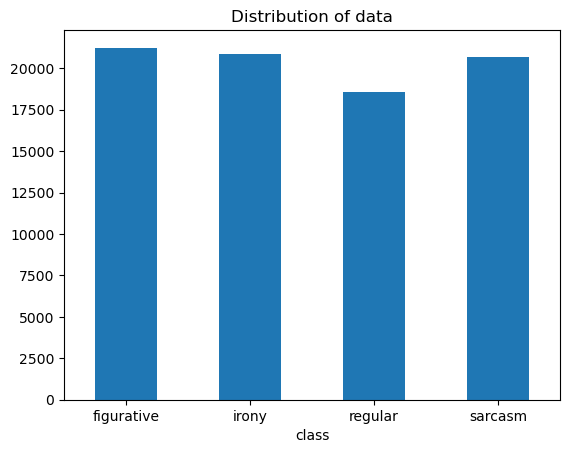

In [14]:
ax = df.groupby('class').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['figurative', 'irony', 'regular', 'sarcasm'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['tweets']), list(df['class'])

In [15]:
class_counts=df['class'].value_counts()
class_counts

figurative    21235
irony         20877
sarcasm       20678
regular       18569
Name: class, dtype: int64

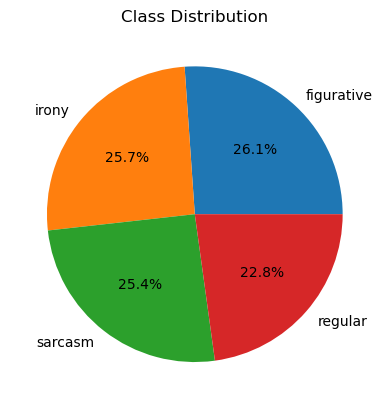

In [16]:
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()

# Data Preprocessing

## Selecting the tweets and Class(Target column) for our further analysis

In [17]:
data=df[['tweets','class']]
data

tweets       class
0      Be aware  dirty step to get money  #staylight ...  figurative
1      #sarcasm for #people who don't understand #diy...  figurative
2      @IminworkJeremy @medsingle #DailyMail readers ...  figurative
3      @wilw Why do I get the feeling you like games?...  figurative
4      -@TeacherArthurG @rweingarten You probably jus...  figurative
...                                                  ...         ...
81403  Photo: Image via We Heart It http://t.co/ky8Nf...     sarcasm
81404  I never knew..I better put this out to the Uni...     sarcasm
81405  hey just wanted to say thanks @ puberty for le...     sarcasm
81406  I'm sure coverage like the Fox News Special “T...     sarcasm
81407  @skeyno16 at u13?! I won't believe it until I ...     sarcasm

[81359 rows x 2 columns]

### Converting Classes into Numerical Data

In [18]:
data['class'] = data['class'].replace({"figurative":0,"irony":1,"regular":2,"sarcasm":3})

In [19]:
data['class'].unique()

array([0, 1, 2, 3], dtype=int64)

## Making Tweets in Lower case

In [20]:
data['tweets']=data['tweets'].str.lower()
data['tweets'].tail()

81403    photo: image via we heart it http://t.co/ky8nf...
81404    i never knew..i better put this out to the uni...
81405    hey just wanted to say thanks @ puberty for le...
81406    i'm sure coverage like the fox news special “t...
81407    @skeyno16 at u13?! i won't believe it until i ...
Name: tweets, dtype: object

## Remove URLs

In [21]:
import re
def remove_url(text):
    return re.sub('((www.[^s]+)|(https?://[^s]+))|(http?://[^s]+)', '',text)

In [22]:
data['tweets'] = data['tweets'].apply(remove_url)
data.tail(10)

tweets  class
81398             whoa. didn't see that coming. #sarcasm      3
81399  an hour busride home soakin wet is the best th...      3
81400  nothing like having someone to talk to about y...      3
81401  looks like aj brown is having a bad game... he...      3
81402                oh i love 4 hour bus rides #sarcasm      3
81403          photo: image via we heart it sarcasm....       3
81404  i never knew..i better put this out to the uni...      3
81405  hey just wanted to say thanks @ puberty for le...      3
81406  i'm sure coverage like the fox news special “t...      3
81407  @skeyno16 at u13?! i won't believe it until i ...      3

In [23]:
def form_sentence(mylist):
    return ' '.join(mylist)

## Remove Twitter username handles from a given twitter text. (Removes @usernames)

In [24]:
from nltk.tokenize import TweetTokenizer
def cleaning_handles(text):
    tknzr = TweetTokenizer(strip_handles=True)
    return tknzr.tokenize(text)
#data['tweets'] = data['tweets'].astype('str')
data['tweets'] = data['tweets'].apply(cleaning_handles)
data['tweets'].head()

0    [be, aware, dirty, step, to, get, money, #stay...
1    [#sarcasm, for, #people, who, don't, understan...
2    [#dailymail, readers, being, sensible, as, alw...
3    [why, do, i, get, the, feeling, you, like, gam...
4    [-, you, probably, just, missed, the, text, .,...
Name: tweets, dtype: object

In [25]:
data['tweets']=data['tweets'].apply(form_sentence)
data['tweets'].head()

0    be aware dirty step to get money #staylight #s...
1    #sarcasm for #people who don't understand #diy...
2    #dailymail readers being sensible as always #s...
3    why do i get the feeling you like games ? #sar...
4     - you probably just missed the text . #sarcastic
Name: tweets, dtype: object

## Remove hashtags. (Removes #words)

pattern = r'\b#\w+'
data['tweets'] = data['tweets'].apply(lambda x: re.sub("#[A-Za-z0-9_]+", '', x))
data

## Remove Punctuations

In [26]:
import string
def remove_punctuation(text):
    text=str(text)
    return text.translate(str.maketrans('', '', string.punctuation))

In [27]:
data['tweets'] = data['tweets'].apply(remove_punctuation)
data.head(10)

tweets  class
0  be aware dirty step to get money staylight sta...      0
1  sarcasm for people who dont understand diy art...      0
2  dailymail readers being sensible as always sho...      0
3   why do i get the feeling you like games  sarcasm      0
4       you probably just missed the text  sarcastic      0
5  tune in to nigezie and be treated to rachel pl...      0
6  what iz thiz      a friggin dc love fest      ...      0
7  man  i wish i could sexually harass an intoxic...      0
8  for the car ride when i get to listen to you a...      0
9  aamir calls bajrangibhaijaan as salmans best m...      0

## Getting the set containing all stopwords in English

In [28]:
import nltk
from nltk.corpus import stopwords

In [29]:
stopwords_set = set(stopwords.words('english'))

## Removing Stop Words

In [30]:
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwords_set])
data['tweets'] = data['tweets'].apply(cleaning_stopwords)
data['tweets'].head()

0    aware dirty step get money staylight staywhite...
1         sarcasm people dont understand diy artattack
2    dailymail readers sensible always shocker sarc...
3                       get feeling like games sarcasm
4                       probably missed text sarcastic
Name: tweets, dtype: object

## Removing Numerical Data from Tweets

In [31]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
data['tweets'] = data['tweets'].apply(cleaning_numbers)
data['tweets'].tail()

81403                        photo image via heart sarcasm
81404    never knew better put universe lol maybe there...
81405    hey wanted say thanks puberty letting apart it...
81406    im sure coverage like fox news special “ hidde...
81407                         u wont believe see p sarcasm
Name: tweets, dtype: object

## Lemmatization(reducing the derived words to their root form, known as lemma)

In [32]:
lm = nltk.stem.WordNetLemmatizer()
def lemmatizer_on_text(data):
    data=str(data).split()
    text = [lm.lemmatize(word) for word in data]
    text=' '.join(text)
    return text
data['tweets'] = data['tweets'].apply(lemmatizer_on_text)
data['tweets'].head()

0    aware dirty step get money staylight staywhite...
1         sarcasm people dont understand diy artattack
2    dailymail reader sensible always shocker sarca...
3                        get feeling like game sarcasm
4                       probably missed text sarcastic
Name: tweets, dtype: object

## Plotting a cloud of words for figurative

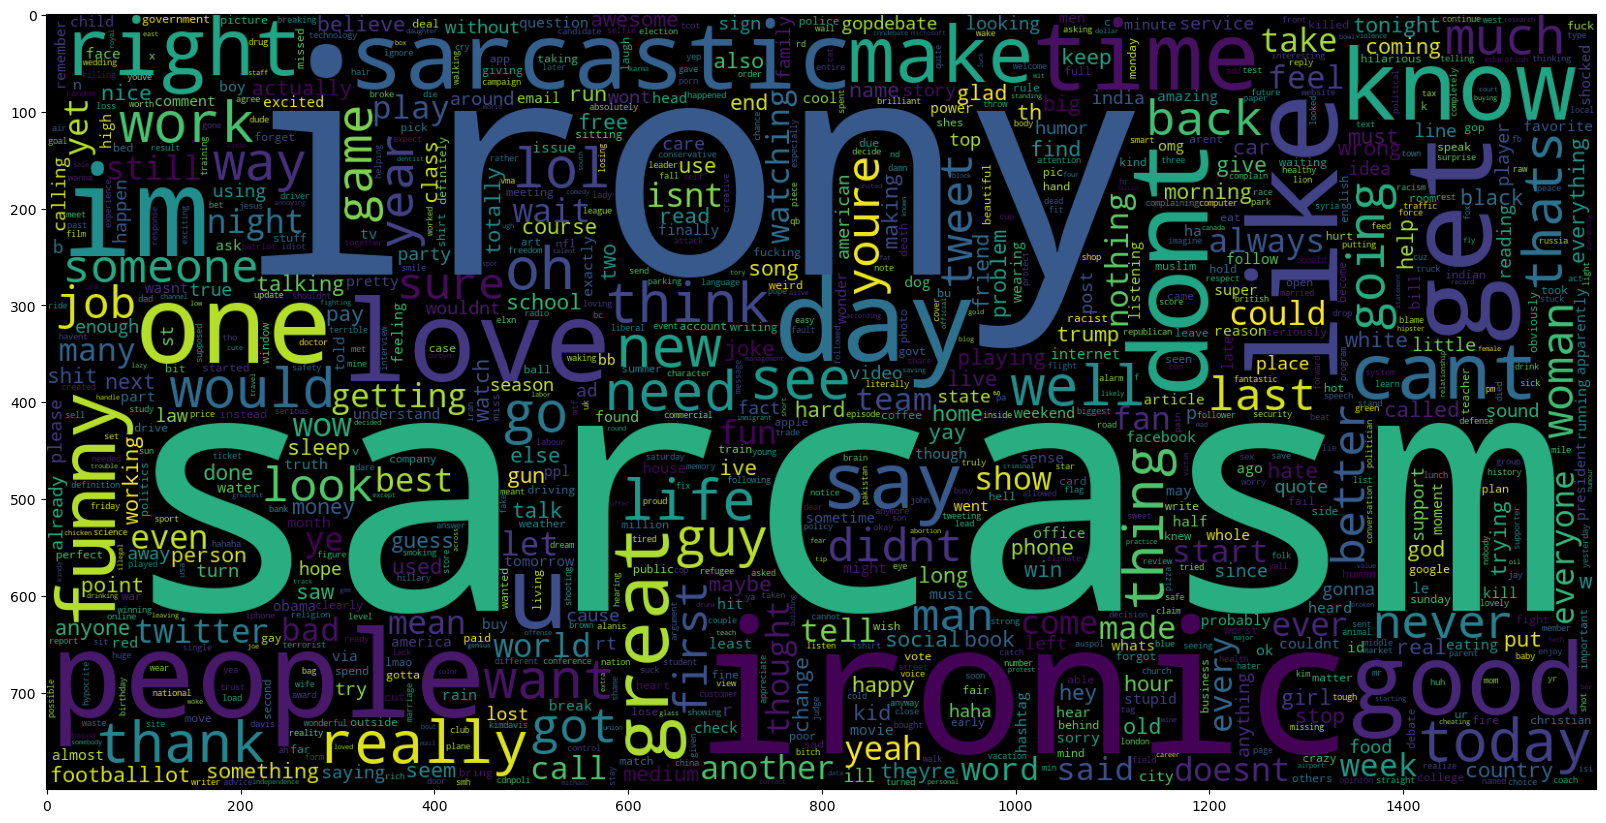

In [33]:
data_fig = data['tweets'].loc[data['class'] == 0]
data_fig = data_fig.astype(str)
text = ' '.join(data_fig)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,collocations=False,stopwords=stopwords_set).generate(text)
plt.imshow(wc)

## Plotting a cloud of words for irony

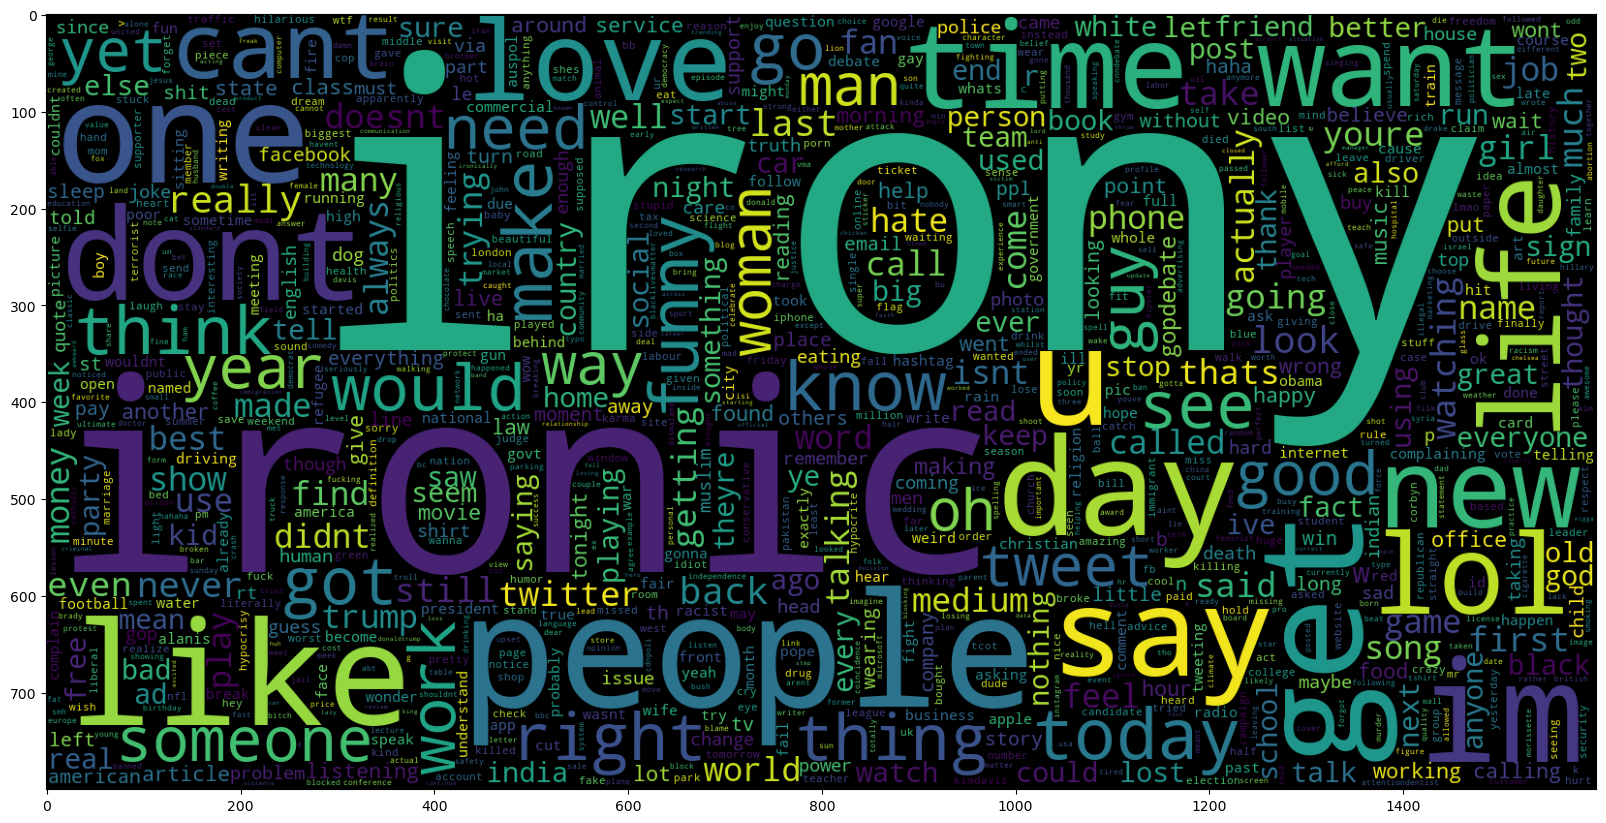

In [34]:
data_fig = data['tweets'].loc[data['class'] == 1]
data_fig = data_fig.astype(str)
text = ' '.join(data_fig)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,collocations=False,stopwords=stopwords_set).generate(text)
plt.imshow(wc)

## Plotting a cloud of words for regular

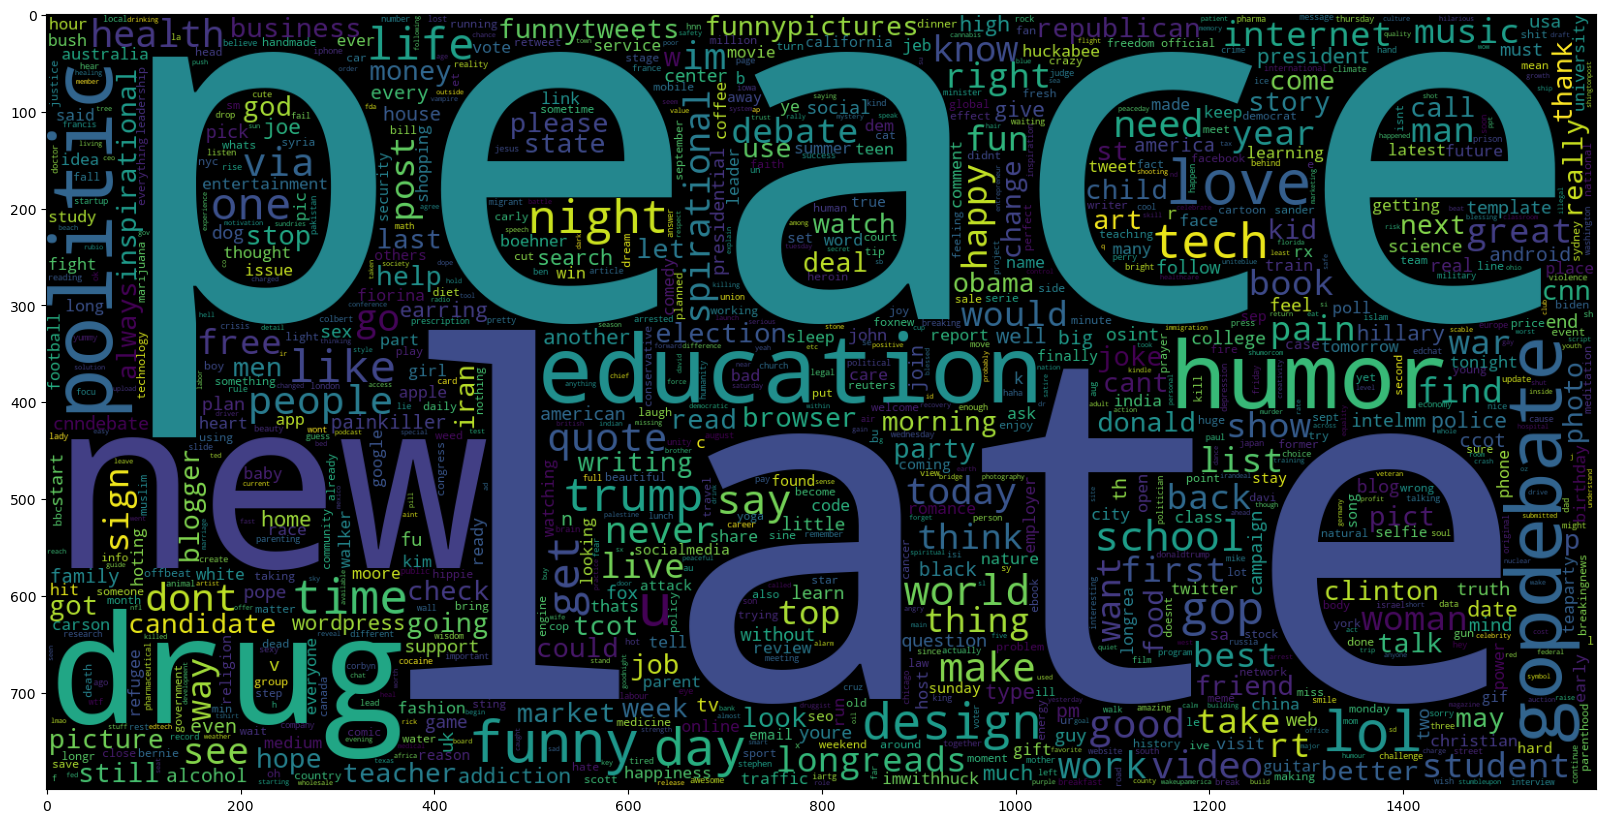

In [35]:
data_fig = data['tweets'].loc[data['class'] == 2]
data_fig = data_fig.astype(str)
text = ' '.join(data_fig)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,collocations=False,stopwords=stopwords_set).generate(text)
plt.imshow(wc)

## Plotting a cloud of words for Sarcasm

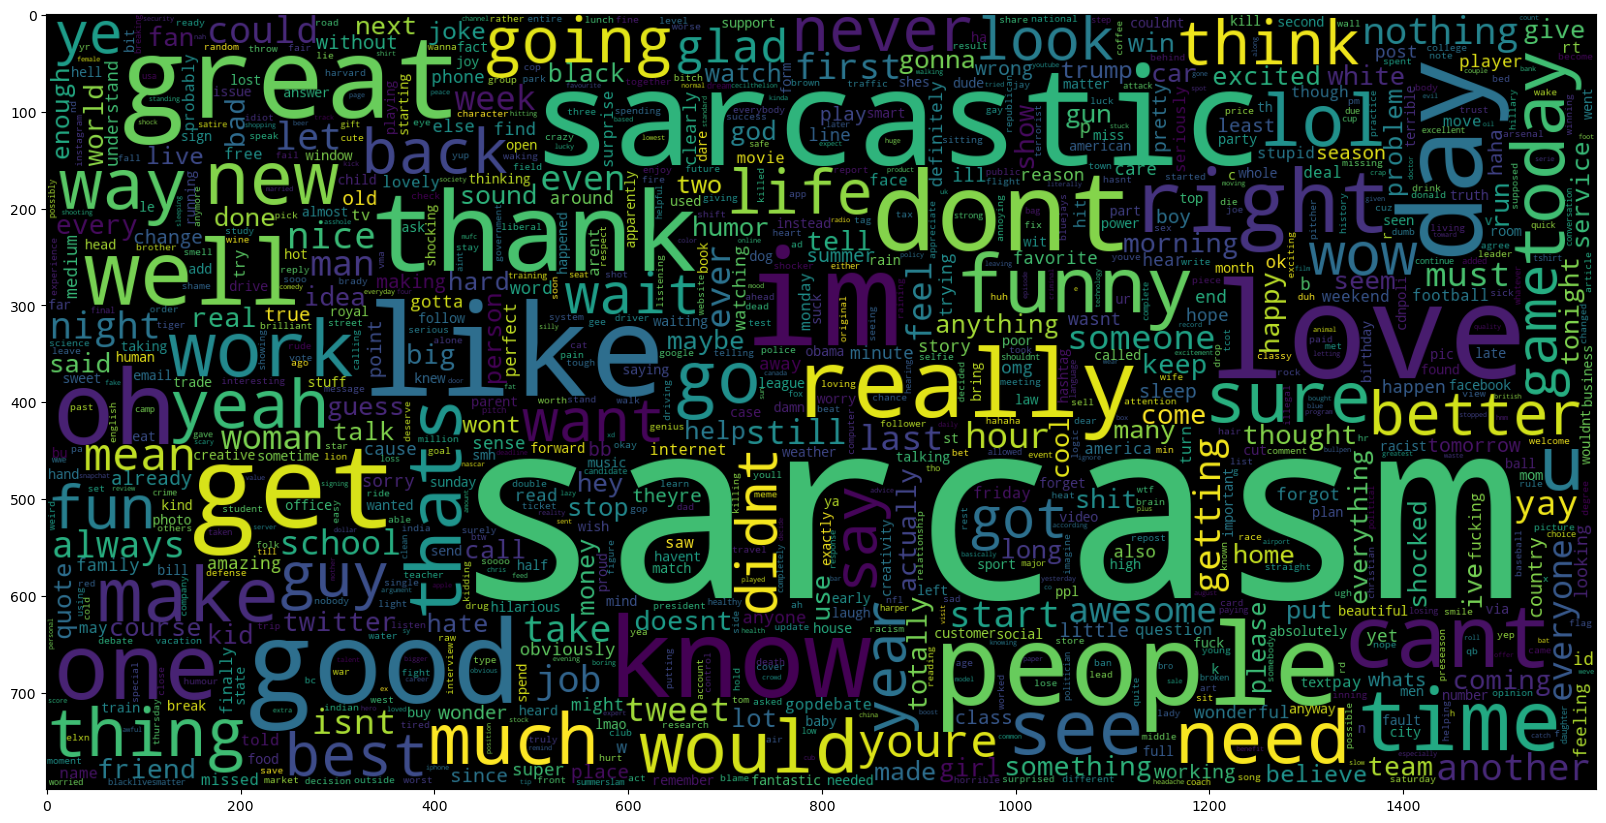

In [36]:
data_fig = data['tweets'].loc[data['class'] == 3]
data_fig = data_fig.astype(str)
text = ' '.join(data_fig)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,collocations=False,stopwords=stopwords_set).generate(text)
plt.imshow(wc)

In [37]:
data['tweets'].tail()

81403                        photo image via heart sarcasm
81404    never knew better put universe lol maybe there...
81405    hey wanted say thanks puberty letting apart it...
81406    im sure coverage like fox news special “ hidde...
81407                         u wont believe see p sarcasm
Name: tweets, dtype: object

In [38]:
data1=data.copy()

## Removing Reduntant Words based on Frequency Appearing the DataSet

In [39]:
delete_words=pd.read_csv('useless_words.csv')
delete_words=delete_words['bigram/trigram']
delete_words

0           im
1         like
2       people
3         love
4          get
        ...   
327      black
328       help
329    without
330       says
331     little
Name: bigram/trigram, Length: 332, dtype: object

In [40]:
remove_set=stopwords_set.union(set(delete_words.values))
remove_set

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'always',
 'am',
 'an',
 'and',
 'another',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'back',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'best',
 'better',
 'between',
 'big',
 'black',
 'both',
 'but',
 'by',
 'can',
 'cant',
 'come',
 'could',
 'couldn',
 "couldn't",
 'd',
 'day',
 'days',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'dont',
 'down',
 'during',
 'each',
 'even',
 'every',
 'few',
 'first',
 'for',
 'from',
 'funny',
 'further',
 'get',
 'give',
 'go',
 'god',
 'going',
 'good',
 'got',
 'great',
 'had',
 'hadn',
 "hadn't",
 'happy',
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'help',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'home',
 'how',
 'i',
 'if',
 'im',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'kids',
 'know',

In [41]:
def cleaning_redunantwords(text):
    return " ".join([word for word in str(text).split() if word not in remove_set])
#data1['tweets']=data1['tweets'].apply(cleaning_redunantwords)

In [42]:
x=data1['tweets']
y=data1['class']

## Removing words which are not part of English Vocabulary

In [43]:
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize

In [44]:
def is_meaningful(word):
    # Exclude stopwords
    if word.lower() in remove_set:
        return False
    # Exclude punctuation marks
    if not word.isalpha():
        return False
    # Exclude words not found in WordNet
    if not wordnet.synsets(word):
        return False
    return True

In [45]:
def remove_meaninglesswords(text):
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if is_meaningful(word)]
    clean_text = ' '.join(filtered_words)
    return clean_text

In [46]:
data1.to_csv('cleaned_data.csv',index=False)

In [47]:
data2=data1.copy()

In [48]:
data2['tweets']=data1['tweets'].apply(remove_meaninglesswords)

In [49]:
data2['class']=data1['class']
data2

tweets  class
0                             aware dirty step sarcastic      0
1                                     sarcasm understand      0
2                      reader sensible shocker sarcastic      0
3                                   feeling game sarcasm      0
4                         probably missed text sarcastic      0
...                                                  ...    ...
81403                          photo image heart sarcasm      3
81404  knew put universe maybe date horizon joke sarcasm      3
81405  wanted thanks puberty letting apart bitty fuck...      3
81406  sure coverage fox special hidden harvest influ...      3
81407                           u wont believe p sarcasm      3

[81359 rows x 2 columns]

def form_sentence(mylist):
    return ' '.join(mylist)

data2['tweets']=data2['tweets'].apply(form_sentence)

In [50]:
x=data2['tweets']
y=data2['class']

## Splitting the Data Into Train and Test

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state =61)

## Vectorizing the data using TfidfVectorizer

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser1 = TfidfVectorizer(ngram_range=(1,1), max_features=500)
vectoriser1.fit(X_train)
print('No. of feature_words: ', len(vectoriser1.get_feature_names()))

No. of feature_words:  500


In [53]:
X_train = vectoriser1.fit_transform(X_train)
X_test  = vectoriser1.fit_transform(X_test)

In [54]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['figurative', 'irony', 'regular', 'sarcasm']
    cm_percent = cf_matrix.astype('float') / cf_matrix.sum(axis=0)[:, np.newaxis] * 100
    print(pd.DataFrame(cf_matrix))
    
    sns.heatmap(cf_matrix, annot=True,cmap = 'Blues',fmt = '.1f',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [55]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report

              precision    recall  f1-score   support

           0       0.24      0.23      0.24      4240
           1       0.35      0.30      0.32      4135
           2       0.27      0.62      0.37      3707
           3       0.22      0.00      0.00      4190

    accuracy                           0.28     16272
   macro avg       0.27      0.29      0.23     16272
weighted avg       0.27      0.28      0.23     16272

      0     1     2   3
0   988  1126  2118   8
1  1163  1246  1711  15
2  1073   333  2295   6
3   828   832  2522   8


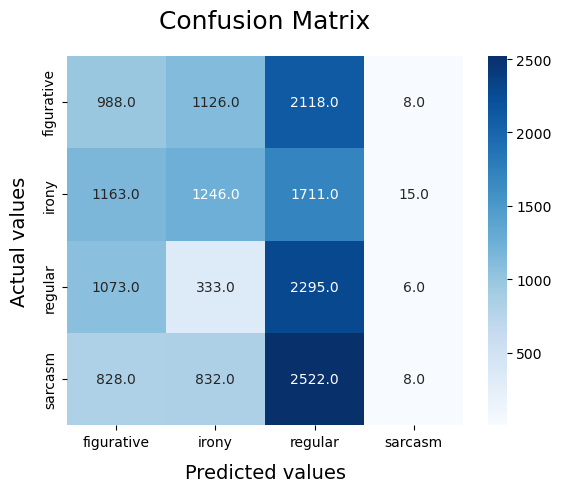

In [56]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

### From the Above Results we can infer that , the Accuracy and F1-Score for the Model is Low

# Multi-class classification problem

The ROC curve assesses the trade-off between true positive rate (sensitivity) and false positive rate (1 - specificity) by varying the classification threshold. It is applicable when you have a binary classification problem (e.g., two classes: positive and negative).

For multi-class classification, you can still evaluate the performance using other metrics such as accuracy, precision, recall, and F1-score, but the ROC curve is not directly applicable. However, you can adapt the ROC curve calculation for multi-class problems using techniques like One-vs-All (also known as One-vs-Rest) or One-vs-One classification.

One-vs-All (OvA) approach:
- Treat each class as positive and the rest as negative.
- Calculate the predicted probabilities for each class.
- Plot ROC curves for each class separately.

One-vs-One (OvO) approach:

- Create a separate binary classifier for each pair of classes.
- Calculate the predicted probabilities for each pair.
- Aggregate the results to generate an ROC curve.

In [57]:
import sklearn
from sklearn.metrics import roc_curve, auc
roc_curves={}
# Create a binary classifier for each class using One-vs-All approach
for class_label in np.unique(y):
    # Set the target labels for the current binary classification task
    binary_labels = np.where(y_train == class_label, 1, 0)
    BNBmodel.fit(X_train, binary_labels)
    probabilities = BNBmodel.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = sklearn.metrics.roc_curve(y_test, probabilities, pos_label=class_label)
    roc_auc = auc(fpr, tpr)
    roc_curves[class_label] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}

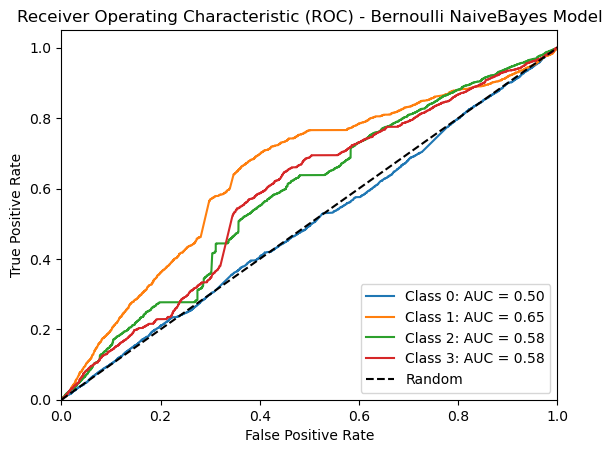

In [58]:
plt.figure()
for class_label, curve_data in roc_curves.items():
    plt.plot(curve_data['fpr'], curve_data['tpr'], label='Class {}: AUC = {:.2f}'.format(class_label, curve_data['auc']))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Bernoulli NaiveBayes Model')
plt.legend(loc='lower right')
plt.show()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4240
           1       0.25      0.02      0.05      4135
           2       0.23      0.97      0.37      3707
           3       0.26      0.02      0.04      4190

    accuracy                           0.23     16272
   macro avg       0.18      0.25      0.11     16272
weighted avg       0.18      0.23      0.11     16272

   0    1     2    3
0  0  118  4043   79
1  0  103  3926  106
2  1   65  3598   43
3  1  125  3985   79


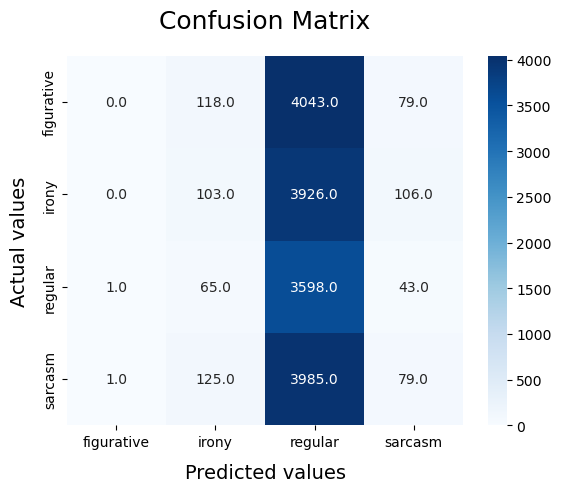

In [59]:
from sklearn.svm import LinearSVC
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

### From the Above Results we can infer that , the Accuracy and F1-Score for the Model is also Low

In [60]:
# Create a binary classifier for each class using One-vs-All approach
for class_label in np.unique(y):
    # Set the target labels for the current binary classification task
    binary_labels = np.where(y_train == class_label, 1, 0)
    SVCmodel.fit(X_train, binary_labels)
    decision_values = SVCmodel.decision_function(X_test)
    probabilities = (decision_values - np.min(decision_values)) / (np.max(decision_values) - np.min(decision_values))
    fpr, tpr, _ = roc_curve(y_test, probabilities, pos_label=class_label)
    roc_auc = auc(fpr, tpr)
    roc_curves[class_label] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}

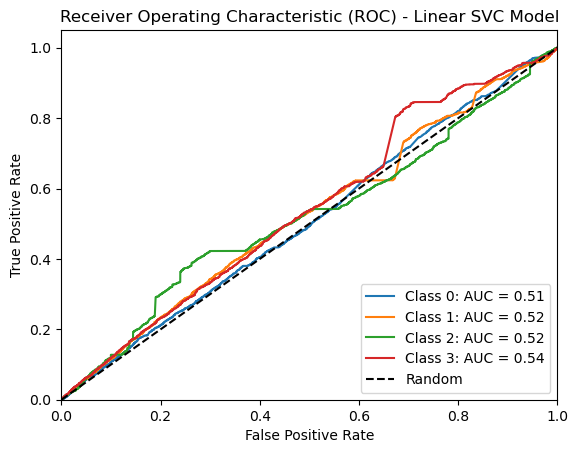

In [61]:
plt.figure()
for class_label, curve_data in roc_curves.items():
    plt.plot(curve_data['fpr'], curve_data['tpr'], label='Class {}: AUC = {:.2f}'.format(class_label, curve_data['auc']))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Linear SVC Model')
plt.legend(loc='lower right')
plt.show()

              precision    recall  f1-score   support

           0       0.33      0.00      0.00      4240
           1       0.26      0.01      0.02      4135
           2       0.23      0.98      0.37      3707
           3       0.24      0.01      0.02      4190

    accuracy                           0.23     16272
   macro avg       0.27      0.25      0.10     16272
weighted avg       0.27      0.23      0.10     16272

   0   1     2   3
0  1  47  4162  30
1  0  52  4017  66
2  1  40  3647  19
3  1  58  4094  37


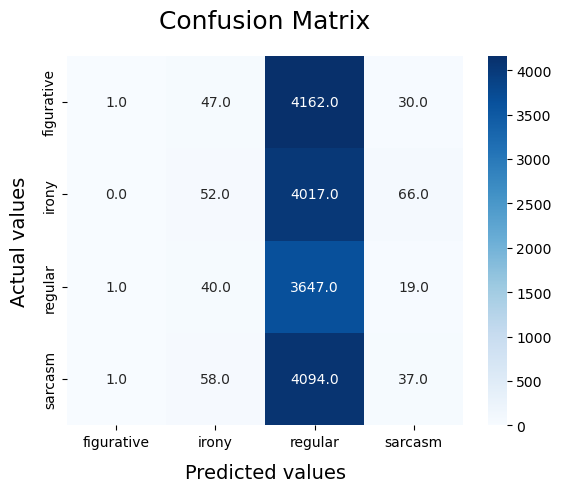

In [62]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

In [63]:
# Create a binary classifier for each class using One-vs-All approach
for class_label in np.unique(y):
    # Set the target labels for the current binary classification task
    binary_labels = np.where(y_train == class_label, 1, 0)
    LRmodel.fit(X_train, binary_labels)
    decision_values = LRmodel.decision_function(X_test)
    probabilities = (decision_values - np.min(decision_values)) / (np.max(decision_values) - np.min(decision_values))
    fpr, tpr, _ = roc_curve(y_test, probabilities, pos_label=class_label)
    roc_auc = auc(fpr, tpr)
    roc_curves[class_label] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}

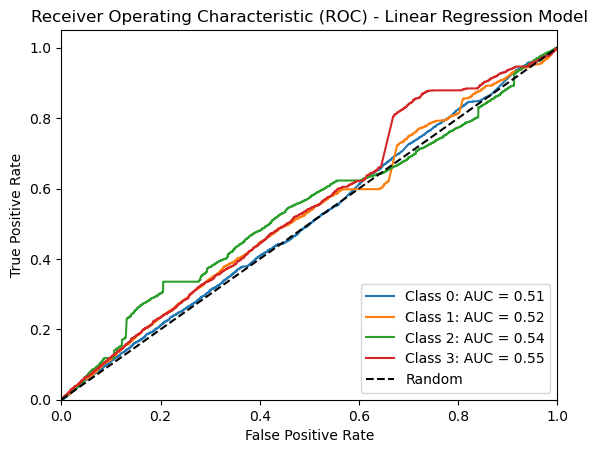

In [64]:
plt.figure()
for class_label, curve_data in roc_curves.items():
    plt.plot(curve_data['fpr'], curve_data['tpr'], label='Class {}: AUC = {:.2f}'.format(class_label, curve_data['auc']))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Linear Regression Model')
plt.legend(loc='lower right')
plt.show()

### From the Above Results we can infer that , the Accuracy and F1-Score for the Model is also Low

In [65]:
print(np.round(np.mean(y_pred1==y_test)*100,2) , "Bernoulli Naive Bayes Model")
print(np.round(np.mean(y_pred2==y_test)*100,2) , "SVC model")
print(np.round(np.mean(y_pred3==y_test)*100,2) , "Linear Regression Model")

27.88 Bernoulli Naive Bayes Model
23.23 SVC model
22.97 Linear Regression Model


## Feature Engineering

## Unigram and Bigram Vectorizer

In [66]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state =61)

In [67]:
vectoriser1 = TfidfVectorizer(ngram_range=(1,1), max_features=500)
vectoriser1.fit(X_train)
print('No. of feature_words: ', len(vectoriser1.get_feature_names()))
X1 = vectoriser1.fit_transform(X_train).toarray()

No. of feature_words:  500


In [68]:
vectoriser2 = TfidfVectorizer(ngram_range=(2,2), max_features=500)
vectoriser2.fit(X_train)
print('No. of feature_words: ', len(vectoriser2.get_feature_names()))
X2 = vectoriser1.fit_transform(X_train).toarray()

No. of feature_words:  500


In [69]:
voca1=vectoriser1.get_feature_names()
voca2=vectoriser2.get_feature_names()

In [70]:
voca1.extend(voca2)

In [71]:
vectoriser=TfidfVectorizer(vocabulary=voca1)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  1000


In [72]:
for i in vectoriser.get_feature_names():
    print(i)

able
absolutely
account
act
actually
ad
ago
air
almost
already
also
amazing
america
american
answer
apparently
apple
around
art
article
ask
asked
asking
attack
away
awesome
baby
bad
ball
bb
beat
beautiful
become
bed
behind
believe
bill
birthday
bit
blog
blue
body
book
boy
brain
break
bring
bus
business
buy
call
called
calling
came
campaign
candidate
car
card
care
case
cat
cause
change
check
child
china
christian
church
city
class
clearly
clinton
close
coffee
college
coming
comment
company
conservative
cool
cop
country
course
crazy
customer
cut
dad
damn
date
dead
deal
death
debate
definitely
design
different
dog
done
dream
drink
drive
driver
driving
drop
drug
dude
due
early
eat
eating
education
election
email
end
english
enjoy
enough
event
ever
exactly
excited
eye
face
fact
fail
fair
fall
family
fan
far
favorite
feel
feeling
fight
finally
find
fine
fire
follow
food
football
forget
forgot
form
found
fox
free
freedom
friday
friend
front
fuck
fucking
full
fun
future
game
gay
getting
girl
g

In [73]:
X_train = vectoriser.fit_transform(X_train)
X_test  = vectoriser.transform(X_test)

              precision    recall  f1-score   support

           0       0.26      0.05      0.08      4240
           1       0.66      0.94      0.77      4135
           2       0.98      0.95      0.97      3707
           3       0.66      0.93      0.77      4190

    accuracy                           0.71     16272
   macro avg       0.64      0.72      0.65     16272
weighted avg       0.63      0.71      0.64     16272

     0     1     2     3
0  207  2007    22  2004
1  186  3892    56     1
2  143    32  3532     0
3  273     0     1  3916


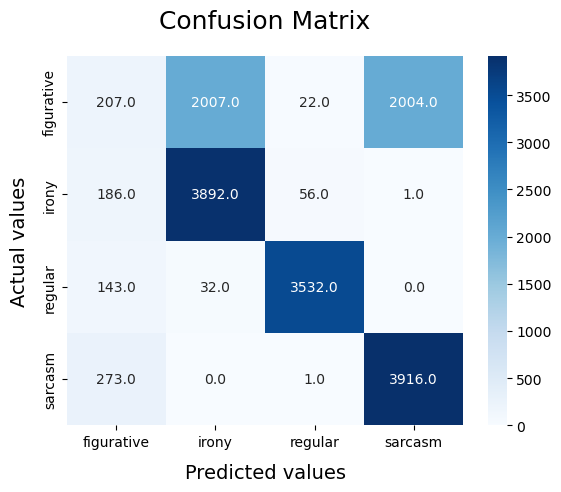

In [74]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

## We see improved Accuracy from 49.1% to 71.0% , however the F1-Score is still Low for the data

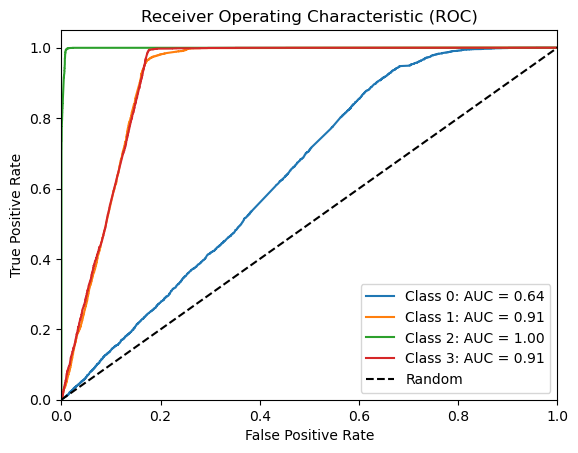

In [75]:
import sklearn
from sklearn.metrics import roc_curve, auc
roc_curves={}
# Create a binary classifier for each class using One-vs-All approach
for class_label in np.unique(y):
    # Set the target labels for the current binary classification task
    binary_labels = np.where(y_train == class_label, 1, 0)
    BNBmodel.fit(X_train, binary_labels)
    probabilities = BNBmodel.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = sklearn.metrics.roc_curve(y_test, probabilities, pos_label=class_label)
    roc_auc = auc(fpr, tpr)
    roc_curves[class_label] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}
plt.figure()
for class_label, curve_data in roc_curves.items():
    plt.plot(curve_data['fpr'], curve_data['tpr'], label='Class {}: AUC = {:.2f}'.format(class_label, curve_data['auc']))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

              precision    recall  f1-score   support

           0       0.39      0.01      0.02      4240
           1       0.66      0.97      0.79      4135
           2       0.97      1.00      0.98      3707
           3       0.66      0.99      0.79      4190

    accuracy                           0.73     16272
   macro avg       0.67      0.74      0.65     16272
weighted avg       0.66      0.73      0.63     16272

    0     1     2     3
0  46  2070    36  2088
1  30  4026    78     1
2   0     4  3703     0
3  42     0     6  4142


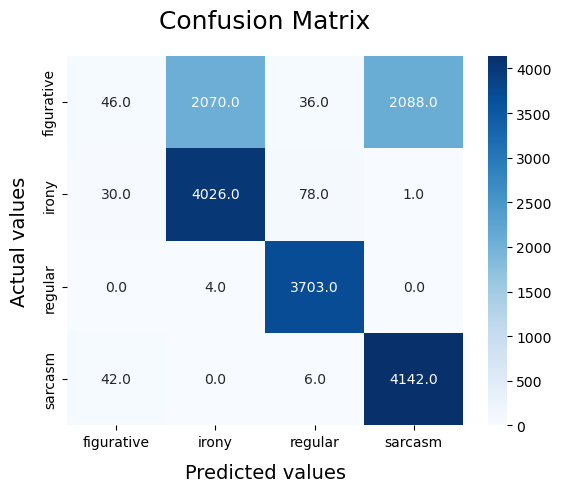

In [76]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

## We see improved Accuracy , however the F1-Score for Figurative Class is still Low for the data

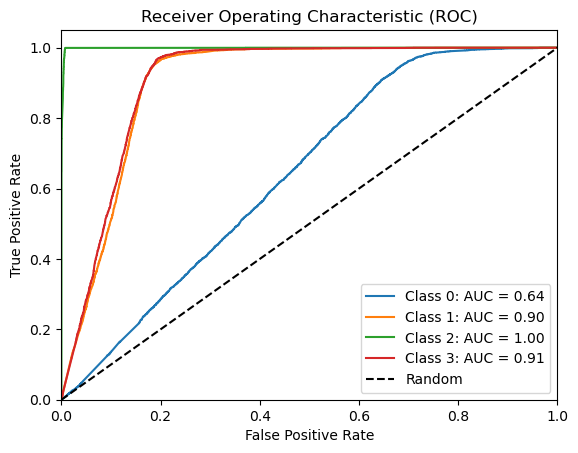

In [77]:
# Create a binary classifier for each class using One-vs-All approach
for class_label in np.unique(y):
    # Set the target labels for the current binary classification task
    binary_labels = np.where(y_train == class_label, 1, 0)
    SVCmodel.fit(X_train, binary_labels)
    decision_values = SVCmodel.decision_function(X_test)
    probabilities = (decision_values - np.min(decision_values)) / (np.max(decision_values) - np.min(decision_values))
    fpr, tpr, _ = roc_curve(y_test, probabilities, pos_label=class_label)
    roc_auc = auc(fpr, tpr)
    roc_curves[class_label] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}
plt.figure()
for class_label, curve_data in roc_curves.items():
    plt.plot(curve_data['fpr'], curve_data['tpr'], label='Class {}: AUC = {:.2f}'.format(class_label, curve_data['auc']))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

              precision    recall  f1-score   support

           0       0.34      0.01      0.02      4240
           1       0.66      0.98      0.79      4135
           2       0.97      1.00      0.99      3707
           3       0.66      0.98      0.79      4190

    accuracy                           0.73     16272
   macro avg       0.66      0.74      0.65     16272
weighted avg       0.65      0.73      0.63     16272

    0     1     2     3
0  40  2079    31  2090
1  13  4050    71     1
2   0     3  3704     0
3  66     0     5  4119


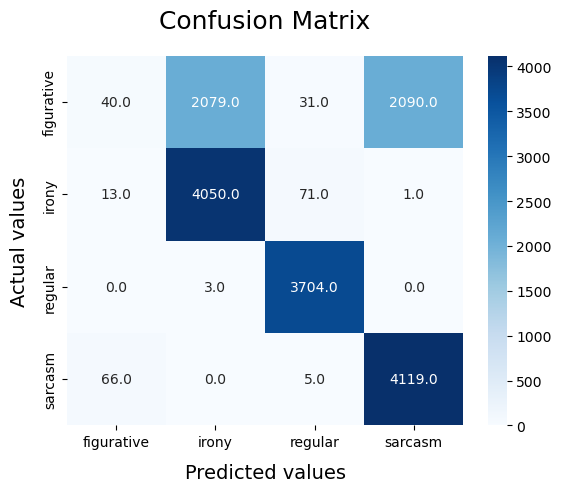

In [78]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

## We see improved Overall Accuracy , however the F1-Score for Figurative Class is still Low for the data

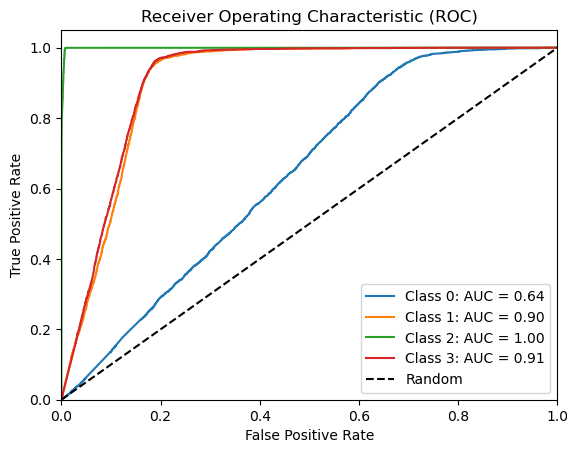

In [79]:
# Create a binary classifier for each class using One-vs-All approach
for class_label in np.unique(y):
    # Set the target labels for the current binary classification task
    binary_labels = np.where(y_train == class_label, 1, 0)
    LRmodel.fit(X_train, binary_labels)
    decision_values = LRmodel.decision_function(X_test)
    probabilities = (decision_values - np.min(decision_values)) / (np.max(decision_values) - np.min(decision_values))
    fpr, tpr, _ = roc_curve(y_test, probabilities, pos_label=class_label)
    roc_auc = auc(fpr, tpr)
    roc_curves[class_label] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}
plt.figure()
for class_label, curve_data in roc_curves.items():
    plt.plot(curve_data['fpr'], curve_data['tpr'], label='Class {}: AUC = {:.2f}'.format(class_label, curve_data['auc']))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [80]:
print(np.round(np.mean(y_pred1==y_test)*100,2) , "Bernoulli Naive Bayes Model")
print(np.round(np.mean(y_pred2==y_test)*100,2) , "SVC model")
print(np.round(np.mean(y_pred3==y_test)*100,2) , "Linear Regression Model")

70.96 Bernoulli Naive Bayes Model
73.24 SVC model
73.21 Linear Regression Model


## Unigram, Bigram and Trigram Vectorizer

In [81]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state =61)

In [82]:
vectoriser1 = TfidfVectorizer(ngram_range=(1,1), max_features=500)
vectoriser1.fit(X_train)
print('No. of feature_words: ', len(vectoriser1.get_feature_names()))
X1 = vectoriser1.fit_transform(X_train).toarray()

No. of feature_words:  500


In [83]:
vectoriser2 = TfidfVectorizer(ngram_range=(2,2), max_features=500)
vectoriser2.fit(X_train)
print('No. of feature_words: ', len(vectoriser2.get_feature_names()))
X2 = vectoriser1.fit_transform(X_train).toarray()

No. of feature_words:  500


In [84]:
vectoriser3 = TfidfVectorizer(ngram_range=(3,3), max_features=500)
vectoriser3.fit(X_train)
print('No. of feature_words: ', len(vectoriser3.get_feature_names()))
X3 = vectoriser1.fit_transform(X_train).toarray()

No. of feature_words:  500


In [85]:
voca1=vectoriser1.get_feature_names()
voca2=vectoriser2.get_feature_names()
voca3=vectoriser3.get_feature_names()

In [86]:
voca1.extend(voca2)
voca1.extend(voca3)

In [87]:
vectoriser=TfidfVectorizer(vocabulary=voca1)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  1500


In [88]:
for i in vectoriser.get_feature_names():
    print(i)

able
absolutely
account
act
actually
ad
ago
air
almost
already
also
amazing
america
american
answer
apparently
apple
around
art
article
ask
asked
asking
attack
away
awesome
baby
bad
ball
bb
beat
beautiful
become
bed
behind
believe
bill
birthday
bit
blog
blue
body
book
boy
brain
break
bring
bus
business
buy
call
called
calling
came
campaign
candidate
car
card
care
case
cat
cause
change
check
child
china
christian
church
city
class
clearly
clinton
close
coffee
college
coming
comment
company
conservative
cool
cop
country
course
crazy
customer
cut
dad
damn
date
dead
deal
death
debate
definitely
design
different
dog
done
dream
drink
drive
driver
driving
drop
drug
dude
due
early
eat
eating
education
election
email
end
english
enjoy
enough
event
ever
exactly
excited
eye
face
fact
fail
fair
fall
family
fan
far
favorite
feel
feeling
fight
finally
find
fine
fire
follow
food
football
forget
forgot
form
found
fox
free
freedom
friday
friend
front
fuck
fucking
full
fun
future
game
gay
getting
girl
g

In [89]:
X_train = vectoriser.fit_transform(X_train)
X_test  = vectoriser.fit_transform(X_test)

              precision    recall  f1-score   support

           0       0.26      0.05      0.08      4240
           1       0.66      0.94      0.77      4135
           2       0.98      0.95      0.96      3707
           3       0.66      0.93      0.77      4190

    accuracy                           0.71     16272
   macro avg       0.64      0.72      0.65     16272
weighted avg       0.63      0.71      0.64     16272

     0     1     2     3
0  207  2007    22  2004
1  186  3892    56     1
2  144    34  3529     0
3  273     0     1  3916


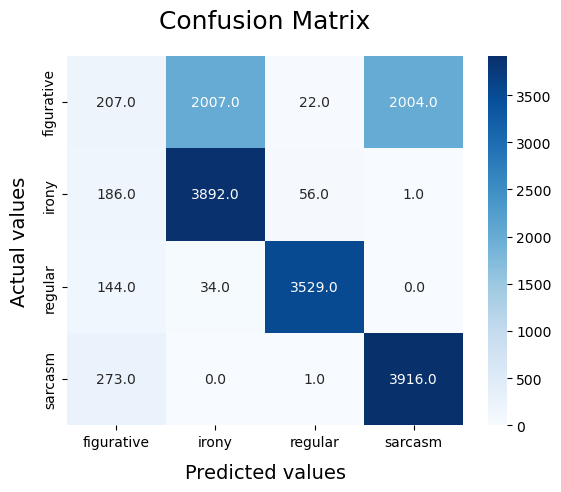

In [90]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

## We see that Accuracy is still 71.0% , however the F1-Score is still Low for the data

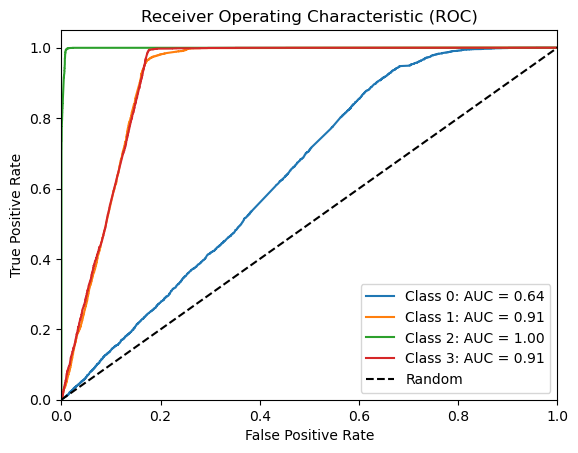

In [91]:
import sklearn
from sklearn.metrics import roc_curve, auc
roc_curves={}
# Create a binary classifier for each class using One-vs-All approach
for class_label in np.unique(y):
    # Set the target labels for the current binary classification task
    binary_labels = np.where(y_train == class_label, 1, 0)
    BNBmodel.fit(X_train, binary_labels)
    probabilities = BNBmodel.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = sklearn.metrics.roc_curve(y_test, probabilities, pos_label=class_label)
    roc_auc = auc(fpr, tpr)
    roc_curves[class_label] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}
plt.figure()
for class_label, curve_data in roc_curves.items():
    plt.plot(curve_data['fpr'], curve_data['tpr'], label='Class {}: AUC = {:.2f}'.format(class_label, curve_data['auc']))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

              precision    recall  f1-score   support

           0       0.39      0.01      0.02      4240
           1       0.66      0.97      0.79      4135
           2       0.97      1.00      0.98      3707
           3       0.66      0.99      0.79      4190

    accuracy                           0.73     16272
   macro avg       0.67      0.74      0.65     16272
weighted avg       0.66      0.73      0.63     16272

    0     1     2     3
0  47  2070    36  2087
1  31  4025    77     2
2   0     4  3703     0
3  43     0     6  4141


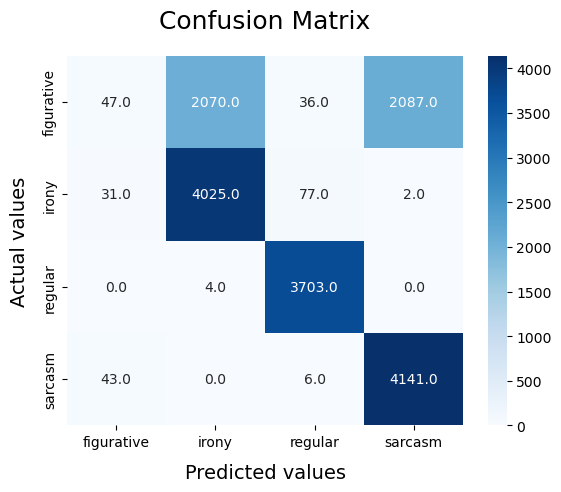

In [92]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

## We see improved Accuracy , however the F1-Score for Figurative Class is still Low for the data

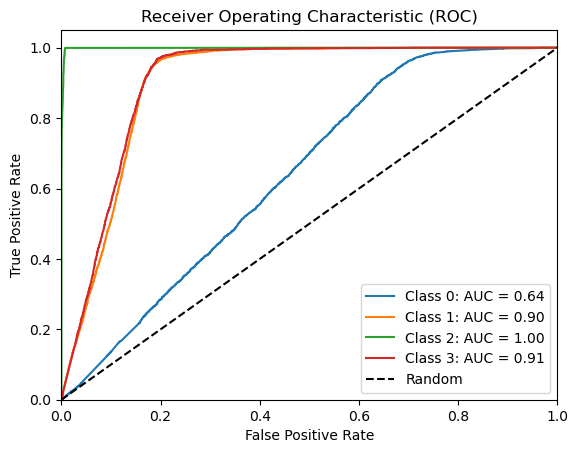

In [93]:
# Create a binary classifier for each class using One-vs-All approach
for class_label in np.unique(y):
    # Set the target labels for the current binary classification task
    binary_labels = np.where(y_train == class_label, 1, 0)
    SVCmodel.fit(X_train, binary_labels)
    decision_values = SVCmodel.decision_function(X_test)
    probabilities = (decision_values - np.min(decision_values)) / (np.max(decision_values) - np.min(decision_values))
    fpr, tpr, _ = roc_curve(y_test, probabilities, pos_label=class_label)
    roc_auc = auc(fpr, tpr)
    roc_curves[class_label] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}
plt.figure()
for class_label, curve_data in roc_curves.items():
    plt.plot(curve_data['fpr'], curve_data['tpr'], label='Class {}: AUC = {:.2f}'.format(class_label, curve_data['auc']))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

              precision    recall  f1-score   support

           0       0.34      0.01      0.02      4240
           1       0.66      0.98      0.79      4135
           2       0.97      1.00      0.99      3707
           3       0.66      0.98      0.79      4190

    accuracy                           0.73     16272
   macro avg       0.66      0.74      0.65     16272
weighted avg       0.65      0.73      0.63     16272

    0     1     2     3
0  40  2079    31  2090
1  13  4050    71     1
2   0     3  3704     0
3  66     0     5  4119


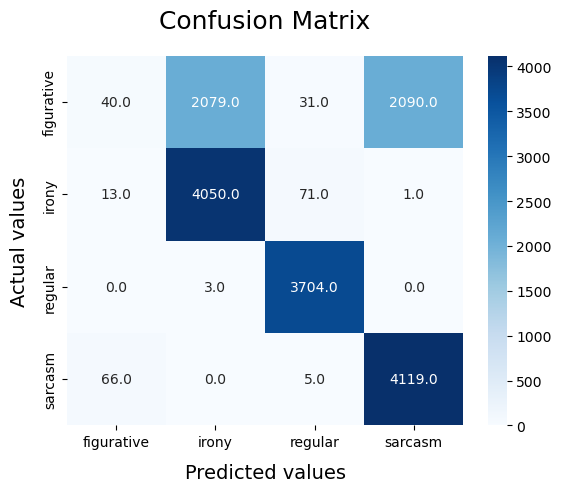

In [94]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

## We see improved Overall Accuracy , however the F1-Score for Figurative Class is still Low for the data

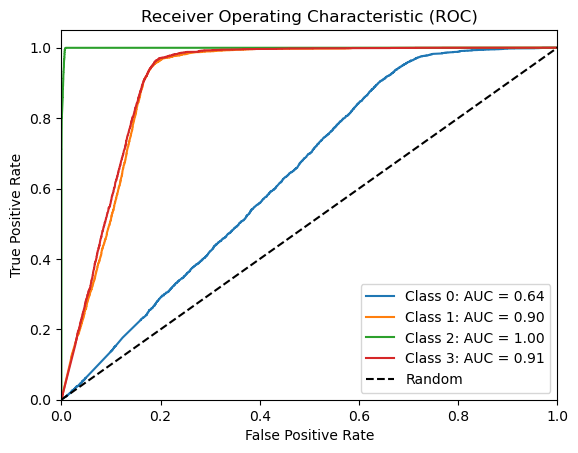

In [95]:
# Create a binary classifier for each class using One-vs-All approach
for class_label in np.unique(y):
    # Set the target labels for the current binary classification task
    binary_labels = np.where(y_train == class_label, 1, 0)
    LRmodel.fit(X_train, binary_labels)
    decision_values = LRmodel.decision_function(X_test)
    probabilities = (decision_values - np.min(decision_values)) / (np.max(decision_values) - np.min(decision_values))
    fpr, tpr, _ = roc_curve(y_test, probabilities, pos_label=class_label)
    roc_auc = auc(fpr, tpr)
    roc_curves[class_label] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}
plt.figure()
for class_label, curve_data in roc_curves.items():
    plt.plot(curve_data['fpr'], curve_data['tpr'], label='Class {}: AUC = {:.2f}'.format(class_label, curve_data['auc']))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [96]:
print(np.round(np.mean(y_pred1==y_test)*100,2) , "Bernoulli Naive Bayes Model")
print(np.round(np.mean(y_pred2==y_test)*100,2) , "SVC model")
print(np.round(np.mean(y_pred3==y_test)*100,2) , "Linear Regression Model")

70.94 Bernoulli Naive Bayes Model
73.23 SVC model
73.21 Linear Regression Model


## Word2Vector

In [97]:
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec

In [98]:
# Generate Word2Vec vectors
def word2vec_features(text, model, num_features):
    feature_vector = np.zeros((num_features,), dtype="float32")
    num_words = 0
    for word in text:
        if word in model.wv.key_to_index:
            num_words += 1
            feature_vector = np.add(feature_vector, model.wv[word])
    if num_words > 0:
        feature_vector = np.divide(feature_vector, num_words)
    return feature_vector

In [99]:
# Train Word2Vec model
def train_word2vec_model(texts, num_features=100, min_word_count=1, context=10):
    model = Word2Vec(texts, vector_size=num_features, min_count=min_word_count, window=context)
    return model

In [100]:
delete_words

0           im
1         like
2       people
3         love
4          get
        ...   
327      black
328       help
329    without
330       says
331     little
Name: bigram/trigram, Length: 332, dtype: object

In [101]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token.lower() not in delete_words]
    return filtered_tokens

In [102]:
data3=pd.DataFrame()

In [103]:
data3['tweets']=data2['tweets'].apply(preprocess_text)
data3['class']=data2['class']
data3

tweets  class
0                        [aware, dirty, step, sarcastic]      0
1                                  [sarcasm, understand]      0
2                 [reader, sensible, shocker, sarcastic]      0
3                               [feeling, game, sarcasm]      0
4                    [probably, missed, text, sarcastic]      0
...                                                  ...    ...
81403                     [photo, image, heart, sarcasm]      3
81404  [knew, put, universe, maybe, date, horizon, jo...      3
81405  [wanted, thanks, puberty, letting, apart, bitt...      3
81406  [sure, coverage, fox, special, hidden, harvest...      3
81407                     [u, wont, believe, p, sarcasm]      3

[81359 rows x 2 columns]

In [104]:
word2vec_model = train_word2vec_model(data3['tweets'])

In [105]:
x=data3['tweets']
y=data3['class']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state =61)

In [107]:
#word2vec_model = train_word2vec_model(X_train)

In [108]:
word2vec_model.wv["aware"]

array([-0.01859717,  0.22057614,  0.19116619,  0.1299348 ,  0.00681553,
       -0.31886032,  0.17359073,  0.4184889 , -0.12363101, -0.04234781,
       -0.04817613, -0.24950792, -0.02868498,  0.19739327, -0.02225726,
       -0.11981167,  0.15752812, -0.10949088, -0.0073077 , -0.3949371 ,
        0.12963337,  0.0382353 ,  0.18082193, -0.16010234,  0.10940101,
        0.05010669, -0.22652791, -0.05765571, -0.19118854,  0.12541224,
        0.17549028, -0.07121094,  0.14597386, -0.16371858, -0.08633053,
        0.06863779,  0.14482073, -0.08257823,  0.00559465, -0.35390338,
       -0.11741339, -0.19338068, -0.24184184, -0.07468546,  0.01626778,
       -0.02130557, -0.23920994,  0.06890588,  0.09190059,  0.25561062,
        0.06176772, -0.27830917, -0.21829267,  0.03122774, -0.05793767,
        0.11380746,  0.32529113, -0.12140678, -0.23996606,  0.30297223,
       -0.16825266,  0.06079663, -0.14873858, -0.07390267, -0.18043758,
        0.24095179,  0.00524427,  0.15352961, -0.07935836,  0.26

In [109]:
word2vec_model.wv["aware"].shape

(100,)

In [110]:
classes=list(df['class'].unique())
classes

['figurative', 'irony', 'regular', 'sarcasm']

In [111]:
from sklearn.decomposition import PCA
class_vectors = np.array([word2vec_model.wv[word] for word in classes])
pca=PCA(n_components=2)
result=pca.fit_transform(class_vectors)
result

array([[-3.62698   , -0.3760437 ],
       [ 3.8485675 , -1.8970052 ],
       [-2.7614524 , -0.03086208],
       [ 2.5398653 ,  2.3039114 ]], dtype=float32)

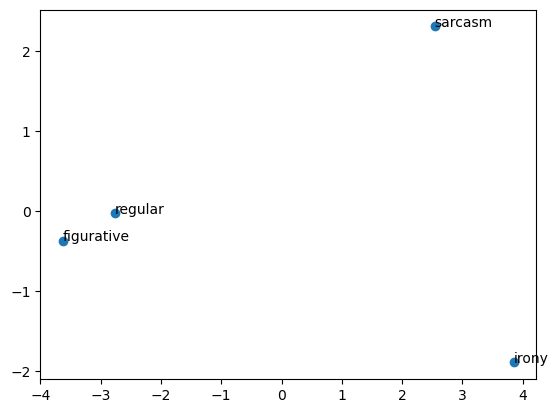

In [112]:
#plt.figure(figsize=(6,6))
plt.scatter(result[:,0],result[:,1])
for i,word in enumerate(classes):
    plt.annotate(word,xy=(result[i,0],result[i,1]))
plt.show()

In [113]:
import pickle

In [114]:
# Save Word2Vec model using pickle
with open("word2vec_model.pkl", "wb") as file:
    pickle.dump(word2vec_model, file)

In [115]:
# Load Word2Vec model from file
#with open("word2vec_model.pkl", "rb") as file:
    #word2vec_model = pickle.load(file)

In [116]:
# word2vec_model.wv["hello"]

In [117]:
data3['vector']=data3['tweets'].apply(lambda text:word2vec_features(text, word2vec_model, num_features=100))

In [118]:
data3

tweets  class  \
0                        [aware, dirty, step, sarcastic]      0   
1                                  [sarcasm, understand]      0   
2                 [reader, sensible, shocker, sarcastic]      0   
3                               [feeling, game, sarcasm]      0   
4                    [probably, missed, text, sarcastic]      0   
...                                                  ...    ...   
81403                     [photo, image, heart, sarcasm]      3   
81404  [knew, put, universe, maybe, date, horizon, jo...      3   
81405  [wanted, thanks, puberty, letting, apart, bitt...      3   
81406  [sure, coverage, fox, special, hidden, harvest...      3   
81407                     [u, wont, believe, p, sarcasm]      3   

                                                  vector  
0      [-0.12200612, 0.33025455, 0.33398962, 0.219498...  
1      [-0.47189584, 0.4318244, 0.0979446, 0.22092631...  
2      [-0.10896638, 0.22393586, 0.2339206, 0.1621558...  
3      [-0.4240171, 0.40063092, 0.46597973, 0.0357701...  
4      [-0.11535851, 0.40021044, 0.43853575, 0.231513...  
...                                                  ...  
81403  [-0.2635925, 0.44537044, 0.3427479, 0.226533, ...  
81404  [-0.14174809, 0.4097091, 0.37390068, 0.2396484...  
81405  [-0.10631843, 0.29783243, 0.2790367, 0.1067369...  
81406  [-0.14289975, 0.3391359, 0.2299709, 0.15424313...  
81407  [-0.114884436, 0.53712136, 0.21362266, 0.35650...  

[81359 rows x 3 columns]

In [119]:
X_train, X_test, y_train, y_test = train_test_split(
    data3.vector.values,
    data3['class'],
    test_size = 0.20, 
    random_state =61
)

In [120]:
X_test.shape

(16272,)

In [121]:
X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [122]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [123]:
X_train_embed = scaler.fit_transform(X_train_2d)
X_test_embed = scaler.transform(X_test_2d)

In [124]:
def model_Evaluate1(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test_embed)
    
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['figurative', 'irony', 'regular', 'sarcasm']
    cm_percent = cf_matrix.astype('float') / cf_matrix.sum(axis=0)[:, np.newaxis] * 100
    print(pd.DataFrame(cf_matrix))
    
    sns.heatmap(cf_matrix, annot=True,cmap = 'Blues',fmt = '.1f',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [125]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

              precision    recall  f1-score   support

           0       0.34      0.35      0.35      4240
           1       0.65      0.67      0.66      4135
           2       0.95      0.88      0.91      3707
           3       0.61      0.61      0.61      4190

    accuracy                           0.62     16272
   macro avg       0.64      0.63      0.63     16272
weighted avg       0.63      0.62      0.62     16272

      0     1     2     3
0  1503  1416    48  1273
1  1261  2783    71    20
2    45    44  3251   367
3  1567    12    38  2573


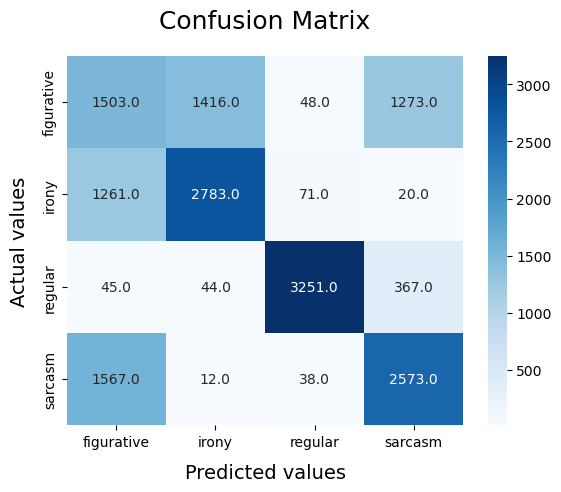

In [126]:
NBmodel = MultinomialNB()
NBmodel.fit(X_train_embed, y_train)
model_Evaluate1(NBmodel)
y_pred1 = NBmodel.predict(X_test_embed)

In [127]:
import sklearn
from sklearn.metrics import roc_curve, auc
roc_curves={}
# Create a binary classifier for each class using One-vs-All approach
for class_label in np.unique(y):
    # Set the target labels for the current binary classification task
    binary_labels = np.where(y_train == class_label, 1, 0)
    NBmodel.fit(X_train_embed, binary_labels)
    probabilities = NBmodel.predict_proba(X_test_embed)[:, 1]
    fpr, tpr, _ = sklearn.metrics.roc_curve(y_test, probabilities, pos_label=class_label)
    roc_auc = auc(fpr, tpr)
    roc_curves[class_label] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}

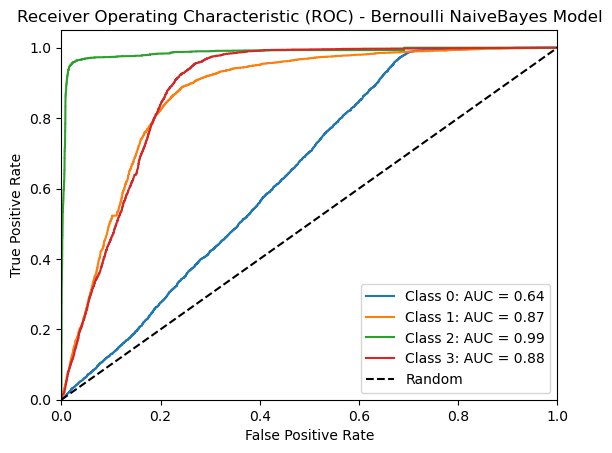

In [128]:
plt.figure()
for class_label, curve_data in roc_curves.items():
    plt.plot(curve_data['fpr'], curve_data['tpr'], label='Class {}: AUC = {:.2f}'.format(class_label, curve_data['auc']))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Bernoulli NaiveBayes Model')
plt.legend(loc='lower right')
plt.show()

              precision    recall  f1-score   support

           0       0.38      0.00      0.01      4240
           1       0.66      0.98      0.79      4135
           2       0.97      1.00      0.98      3707
           3       0.66      0.99      0.80      4190

    accuracy                           0.73     16272
   macro avg       0.67      0.74      0.64     16272
weighted avg       0.66      0.73      0.63     16272

    0     1     2     3
0  15  2077    37  2111
1   9  4050    75     1
2   0     2  3704     1
3  15     0     7  4168


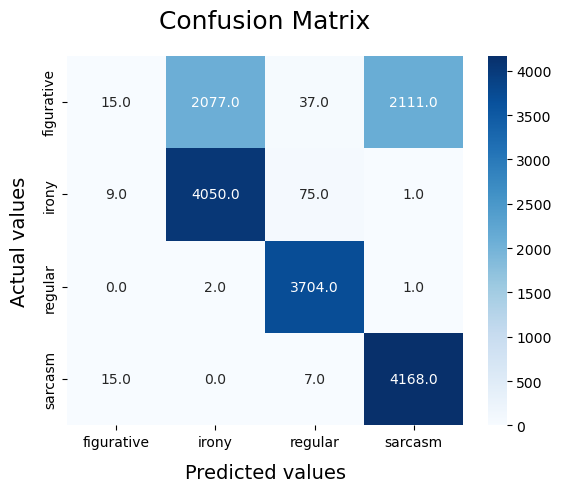

In [129]:
from sklearn.svm import LinearSVC
SVCmodel = LinearSVC()
SVCmodel.fit(X_train_embed, y_train)
model_Evaluate1(SVCmodel)
y_pred2 = SVCmodel.predict(X_test_embed)

In [130]:
# Create a binary classifier for each class using One-vs-All approach
for class_label in np.unique(y):
    # Set the target labels for the current binary classification task
    binary_labels = np.where(y_train == class_label, 1, 0)
    SVCmodel.fit(X_train_embed, binary_labels)
    decision_values = SVCmodel.decision_function(X_test_embed)
    probabilities = (decision_values - np.min(decision_values)) / (np.max(decision_values) - np.min(decision_values))
    fpr, tpr, _ = roc_curve(y_test, probabilities, pos_label=class_label)
    roc_auc = auc(fpr, tpr)
    roc_curves[class_label] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}

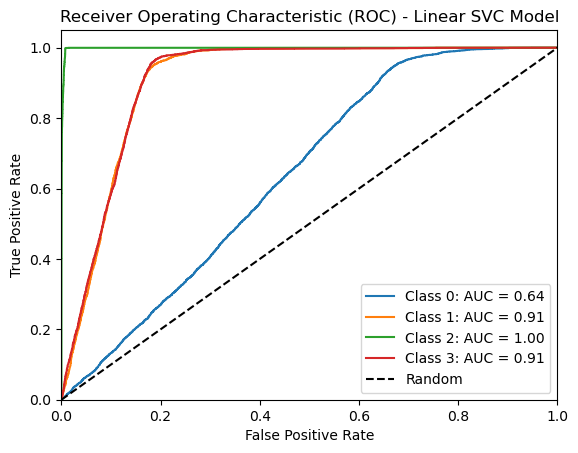

In [131]:
plt.figure()
for class_label, curve_data in roc_curves.items():
    plt.plot(curve_data['fpr'], curve_data['tpr'], label='Class {}: AUC = {:.2f}'.format(class_label, curve_data['auc']))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Linear SVC Model')
plt.legend(loc='lower right')
plt.show()

              precision    recall  f1-score   support

           0       0.35      0.02      0.03      4240
           1       0.66      0.97      0.78      4135
           2       0.97      1.00      0.98      3707
           3       0.66      0.98      0.79      4190

    accuracy                           0.73     16272
   macro avg       0.66      0.74      0.65     16272
weighted avg       0.65      0.73      0.64     16272

    0     1     2     3
0  69  2059    31  2081
1  69  3995    70     1
2   2     3  3702     0
3  59     0     8  4123


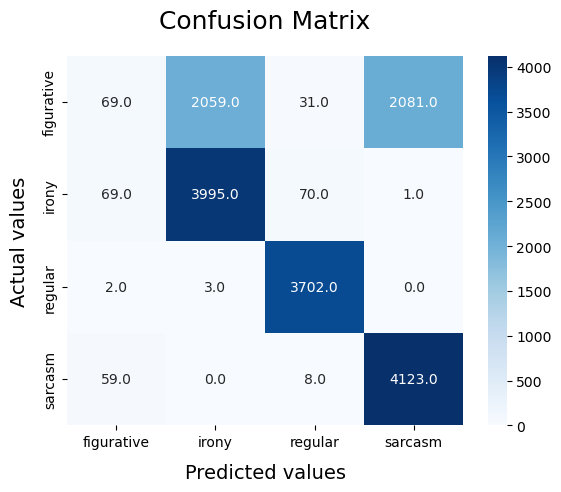

In [132]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train_embed, y_train)
model_Evaluate1(LRmodel)
y_pred3 = LRmodel.predict(X_test_embed)

In [133]:
# Create a binary classifier for each class using One-vs-All approach
for class_label in np.unique(y):
    # Set the target labels for the current binary classification task
    binary_labels = np.where(y_train == class_label, 1, 0)
    LRmodel.fit(X_train_embed, binary_labels)
    decision_values = LRmodel.decision_function(X_test_embed)
    probabilities = (decision_values - np.min(decision_values)) / (np.max(decision_values) - np.min(decision_values))
    fpr, tpr, _ = roc_curve(y_test, probabilities, pos_label=class_label)
    roc_auc = auc(fpr, tpr)
    roc_curves[class_label] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}

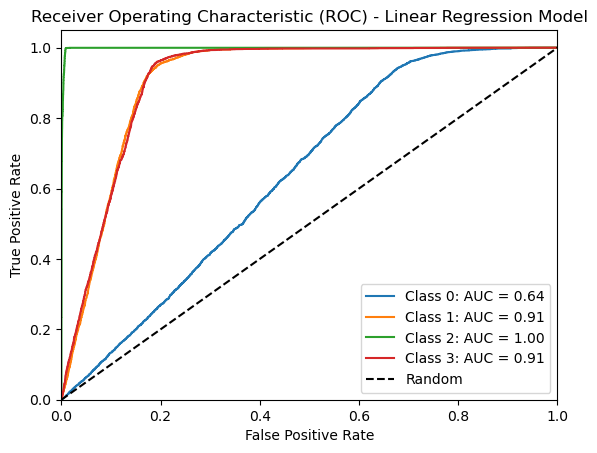

In [134]:
plt.figure()
for class_label, curve_data in roc_curves.items():
    plt.plot(curve_data['fpr'], curve_data['tpr'], label='Class {}: AUC = {:.2f}'.format(class_label, curve_data['auc']))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Linear Regression Model')
plt.legend(loc='lower right')
plt.show()

In [135]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [136]:
# Define the parameter grid for grid search
param_grid = {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    }
param_grid

{'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'p': [1, 2]}

In [137]:
knn = KNeighborsClassifier()

In [138]:
grid_search = GridSearchCV(knn, param_grid, cv=5)

In [139]:
#grid_search.fit(X_train_embed, y_train)

In [140]:
#grid_search.get_params

In [141]:
#grid_search.best_params_

In [142]:
knn = KNeighborsClassifier(n_neighbors=5,weights='uniform',)

In [143]:
knn.fit(X_train_embed, y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.22      0.12      0.15      4240
           1       0.63      0.78      0.69      4135
           2       0.97      0.99      0.98      3707
           3       0.64      0.77      0.70      4190

    accuracy                           0.65     16272
   macro avg       0.61      0.66      0.63     16272
weighted avg       0.60      0.65      0.62     16272

     0     1     2     3
0  495  1907    35  1803
1  862  3207    61     5
2   10    13  3682     2
3  930     3    13  3244


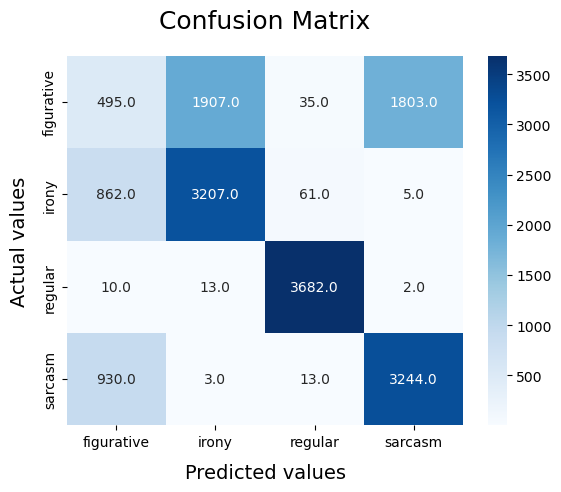

In [144]:
model_Evaluate1(knn)
y_pred4 = knn.predict(X_test_embed)

In [145]:
np.mean(y_test==y_pred1),np.mean(y_test==y_pred2),np.mean(y_test==y_pred3),np.mean(y_test==y_pred4)

(0.6213126843657817, 0.7335914454277286, 0.730641592920354, 0.6531465093411996)

In [146]:
# Save Word2Vec model using pickle
with open("word2vec_model.pkl", "wb") as file:
    pickle.dump(word2vec_model, file)

In [147]:
#SVCmodel
# Save Word2Vec model using pickle
with open("SVCmodel.pkl", "wb") as file:
    pickle.dump(SVCmodel, file)

In [148]:
count_data = pd.read_csv('count_data.csv')
count_data

Unnamed: 0 bigram/trigram  Figurative    Irony  Regulare  Sarcasm  \
0                0        sarcasm     10213.0     13.0       0.0  19774.0   
1                1          irony      7850.0  15873.0       6.0      9.0   
2                2         ironic      2874.0   5265.0       2.0      7.0   
3                3             im      1061.0    848.0     301.0   1213.0   
4                4           like       976.0    875.0     409.0   1082.0   
...            ...            ...         ...      ...       ...      ...   
122213      122213        aaaarhg         0.0      0.0       0.0      1.0   
122214      122214        aaaalll         0.0      0.0       0.0      1.0   
122215      122215          aaaah         0.0      0.0       0.0      1.0   
122216      122216        aaaaand         0.0      0.0       0.0      1.0   
122217      122217      aaaaaalll         0.0      0.0       0.0      1.0   

        Figurative Class  Irony Class  Regular Class  Sarcasm Class  
0                    1.0          0.0            0.0            0.0  
1                    1.0          0.0            0.0            0.0  
2                    1.0          0.0            0.0            0.0  
3                    1.0          0.0            0.0            0.0  
4                    1.0          0.0            0.0            0.0  
...                  ...          ...            ...            ...  
122213               0.0          0.0            0.0            1.0  
122214               0.0          0.0            0.0            1.0  
122215               0.0          0.0            0.0            1.0  
122216               0.0          0.0            0.0            1.0  
122217               0.0          0.0            0.0            1.0  

[122218 rows x 10 columns]

In [149]:
count_data[(count_data["Figurative"]>60) & (count_data["Irony"]>60) & (count_data["Regulare"]>60) & (count_data["Sarcasm"]>60)]

Unnamed: 0 bigram/trigram  Figurative   Irony  Regulare  Sarcasm  \
3               3             im      1061.0   848.0     301.0   1213.0   
4               4           like       976.0   875.0     409.0   1082.0   
5               5         people       957.0  1087.0     326.0    844.0   
6               6           love       838.0   505.0     802.0   1183.0   
7               7            get       825.0   747.0     369.0    815.0   
...           ...            ...         ...     ...       ...      ...   
95210       95210       facebook        82.0   108.0      61.0     65.0   
95218       95218          wants        84.0   130.0      65.0     63.0   
95222       95222           goes        72.0    75.0      64.0     63.0   
95223       95223          found        81.0   119.0      68.0     63.0   
95224       95224        running        81.0    89.0      64.0     62.0   

       Figurative Class  Irony Class  Regular Class  Sarcasm Class  
3                   1.0          0.0            0.0            0.0  
4                   1.0          0.0            0.0            0.0  
5                   1.0          0.0            0.0            0.0  
6                   1.0          0.0            0.0            0.0  
7                   1.0          0.0            0.0            0.0  
...                 ...          ...            ...            ...  
95210               0.0          0.0            0.0            1.0  
95218               0.0          0.0            0.0            1.0  
95222               0.0          0.0            0.0            1.0  
95223               0.0          0.0            0.0            1.0  
95224               0.0          0.0            0.0            1.0  

[720 rows x 10 columns]

In [150]:
strong_words=count_data[(count_data["Figurative"] < count_data["Irony"]) & (count_data["Figurative"] >0 )]["bigram/trigram"]
set1=set(strong_words)

In [151]:
strong_words=count_data[(count_data["Figurative"] < count_data["Regulare"]) & (count_data["Figurative"] >0 )]["bigram/trigram"]
set2=set(strong_words)

In [152]:
strong_words=count_data[(count_data["Figurative"] < count_data["Sarcasm"]) & (count_data["Figurative"] >0 )]["bigram/trigram"]
set3=set(strong_words)

In [153]:
set1=set1.union(set2)
set1=set1.union(set3)

In [154]:
len(set1)

11069

In [155]:
remove_set=set1.copy()

In [156]:
type(remove_set)

set

In [157]:
data2

tweets  class
0                             aware dirty step sarcastic      0
1                                     sarcasm understand      0
2                      reader sensible shocker sarcastic      0
3                                   feeling game sarcasm      0
4                         probably missed text sarcastic      0
...                                                  ...    ...
81403                          photo image heart sarcasm      3
81404  knew put universe maybe date horizon joke sarcasm      3
81405  wanted thanks puberty letting apart bitty fuck...      3
81406  sure coverage fox special hidden harvest influ...      3
81407                           u wont believe p sarcasm      3

[81359 rows x 2 columns]

In [158]:
data4=data2.copy()

In [159]:
df=data4[data4['class']==0]
df

tweets  class
0                        aware dirty step sarcastic      0
1                                sarcasm understand      0
2                 reader sensible shocker sarcastic      0
3                              feeling game sarcasm      0
4                    probably missed text sarcastic      0
...                                             ...    ...
21233                  may favorite subject sarcasm      0
21234                     landline business sarcasm      0
21235                         bad prevented sarcasm      0
21236       drink stella artois enjoy taste sarcasm      0
21237  sterling effort old chap christopher sarcasm      0

[21235 rows x 2 columns]

In [160]:
df['tweets']=df['tweets'].apply(cleaning_redunantwords)

In [161]:
df

tweets  class
0              aware      0
1                         0
2             reader      0
3               game      0
4                         0
...              ...    ...
21233        subject      0
21234       landline      0
21235      prevented      0
21236  stella artois      0
21237           chap      0

[21235 rows x 2 columns]

In [162]:
data4.update(df)
data4

tweets  class
0                                                  aware    0.0
1                                                           0.0
2                                                 reader    0.0
3                                                   game    0.0
4                                                           0.0
...                                                  ...    ...
81403                          photo image heart sarcasm    3.0
81404  knew put universe maybe date horizon joke sarcasm    3.0
81405  wanted thanks puberty letting apart bitty fuck...    3.0
81406  sure coverage fox special hidden harvest influ...    3.0
81407                           u wont believe p sarcasm    3.0

[81359 rows x 2 columns]

In [163]:
strong_words=count_data[(count_data["Irony"] < count_data["Figurative"]) & (count_data["Irony"] >0 )]["bigram/trigram"]
set1=set(strong_words)

strong_words=count_data[(count_data["Irony"] < count_data["Regulare"]) & (count_data["Irony"] >0 )]["bigram/trigram"]
set2=set(strong_words)

strong_words=count_data[(count_data["Irony"] < count_data["Sarcasm"]) & (count_data["Irony"] >0 )]["bigram/trigram"]
set3=set(strong_words)

set1=set1.union(set2)
set1=set1.union(set3)

remove_set=set1.copy()

df=data4[data4['class']==1]
df

df['tweets']=df['tweets'].apply(cleaning_redunantwords)
df

data4.update(df)
data4

tweets  class
0                                                  aware    0.0
1                                                           0.0
2                                                 reader    0.0
3                                                   game    0.0
4                                                           0.0
...                                                  ...    ...
81403                          photo image heart sarcasm    3.0
81404  knew put universe maybe date horizon joke sarcasm    3.0
81405  wanted thanks puberty letting apart bitty fuck...    3.0
81406  sure coverage fox special hidden harvest influ...    3.0
81407                           u wont believe p sarcasm    3.0

[81359 rows x 2 columns]

In [164]:
strong_words=count_data[(count_data["Regulare"] < count_data["Figurative"]) & (count_data["Regulare"] >0 )]["bigram/trigram"]
set1=set(strong_words)

strong_words=count_data[(count_data["Regulare"] < count_data["Irony"]) & (count_data["Regulare"] >0 )]["bigram/trigram"]
set2=set(strong_words)

strong_words=count_data[(count_data["Regulare"] < count_data["Sarcasm"]) & (count_data["Regulare"] >0 )]["bigram/trigram"]
set3=set(strong_words)

set1=set1.union(set2)
set1=set1.union(set3)

remove_set=set1.copy()

df=data4[data4['class']==2]
df

df['tweets']=df['tweets'].apply(cleaning_redunantwords)
df

data4.update(df)
data4

tweets  class
0                                                  aware    0.0
1                                                           0.0
2                                                 reader    0.0
3                                                   game    0.0
4                                                           0.0
...                                                  ...    ...
81403                          photo image heart sarcasm    3.0
81404  knew put universe maybe date horizon joke sarcasm    3.0
81405  wanted thanks puberty letting apart bitty fuck...    3.0
81406  sure coverage fox special hidden harvest influ...    3.0
81407                           u wont believe p sarcasm    3.0

[81359 rows x 2 columns]

In [165]:
strong_words=count_data[(count_data["Sarcasm"] < count_data["Figurative"]) & (count_data["Sarcasm"] >0 )]["bigram/trigram"]
set1=set(strong_words)

strong_words=count_data[(count_data["Sarcasm"] < count_data["Irony"]) & (count_data["Sarcasm"] >0 )]["bigram/trigram"]
set2=set(strong_words)

strong_words=count_data[(count_data["Sarcasm"] < count_data["Regulare"]) & (count_data["Sarcasm"] >0 )]["bigram/trigram"]
set3=set(strong_words)

set1=set1.union(set2)
set1=set1.union(set3)

remove_set=set1.copy()

df=data4[data4['class']==3]
df

df['tweets']=df['tweets'].apply(cleaning_redunantwords)
df

data4.update(df)
data4

tweets  class
0                                                  aware    0.0
1                                                           0.0
2                                                 reader    0.0
3                                                   game    0.0
4                                                           0.0
...                                                  ...    ...
81403                                            sarcasm    3.0
81404                             knew put maybe sarcasm    3.0
81405  wanted thanks puberty letting bitty fucking ti...    3.0
81406                     sure coverage arsonist sarcasm    3.0
81407                           u wont believe p sarcasm    3.0

[81359 rows x 2 columns]

In [166]:
data4=data4[data4["tweets"]!=""]
data4

tweets  class
0                                                  aware    0.0
2                                                 reader    0.0
3                                                   game    0.0
5                                       rachel reminisce    0.0
7                                   sexually intoxicated    0.0
...                                                  ...    ...
81403                                            sarcasm    3.0
81404                             knew put maybe sarcasm    3.0
81405  wanted thanks puberty letting bitty fucking ti...    3.0
81406                     sure coverage arsonist sarcasm    3.0
81407                           u wont believe p sarcasm    3.0

[74460 rows x 2 columns]

In [167]:
data4['class'].value_counts()

1.0    20854
3.0    20674
2.0    18168
0.0    14764
Name: class, dtype: int64

In [168]:
x=data4['tweets']
y=data4['class']

In [169]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state =61)

In [170]:
data4['tweets']=data4['tweets'].apply(preprocess_text)

In [171]:
data4

tweets  class
0                                                [aware]    0.0
2                                               [reader]    0.0
3                                                 [game]    0.0
5                                    [rachel, reminisce]    0.0
7                                [sexually, intoxicated]    0.0
...                                                  ...    ...
81403                                          [sarcasm]    3.0
81404                        [knew, put, maybe, sarcasm]    3.0
81405  [wanted, thanks, puberty, letting, bitty, fuck...    3.0
81406                [sure, coverage, arsonist, sarcasm]    3.0
81407                     [u, wont, believe, p, sarcasm]    3.0

[74460 rows x 2 columns]

In [172]:
word2vec_model = train_word2vec_model(data4['tweets'])

In [173]:
word2vec_model.wv["aware"]

array([-0.00964215,  0.12497485,  0.16635382,  0.08340558, -0.00357719,
        0.04483389, -0.02903968,  0.09938012, -0.01573106, -0.07623026,
       -0.1028401 , -0.16897629, -0.06819553, -0.09783654,  0.00371463,
       -0.08108655, -0.11199204, -0.07467779,  0.06892536, -0.12551525,
        0.06353687, -0.20401706,  0.0117092 , -0.10014091,  0.04612264,
        0.16793025,  0.0009258 , -0.06660006,  0.03485202,  0.15508208,
        0.13001837, -0.07052191, -0.00912832, -0.08868637,  0.01897388,
       -0.01728395,  0.02168712, -0.00420643, -0.05685595, -0.0341566 ,
        0.0870985 , -0.03136042, -0.15884976,  0.14784928, -0.01482024,
       -0.11372435, -0.04340935, -0.02987101,  0.02346144,  0.09463197,
        0.06457298, -0.0274196 , -0.05225518, -0.0016085 , -0.01506858,
        0.0227802 ,  0.14858007, -0.07673421, -0.02122157, -0.07403687,
        0.05026488,  0.00626643, -0.02673968, -0.04569816,  0.05410692,
        0.07533734,  0.08700763,  0.0087285 , -0.09826634, -0.07

In [174]:
data4['vector']=data4['tweets'].apply(lambda text:word2vec_features(text, word2vec_model, num_features=100))

In [175]:
X_train, X_test, y_train, y_test = train_test_split(
    data4.vector.values,
    data4['class'],
    test_size = 0.20, 
    random_state =61
)

In [176]:
X_test.shape

(14892,)

In [177]:
X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [178]:
X_train_embed = scaler.fit_transform(X_train_2d)
X_test_embed = scaler.transform(X_test_2d)

              precision    recall  f1-score   support

         0.0       0.70      0.83      0.76      2984
         1.0       1.00      0.93      0.96      4219
         2.0       0.82      0.83      0.82      3576
         3.0       1.00      0.92      0.96      4113

    accuracy                           0.88     14892
   macro avg       0.88      0.88      0.88     14892
weighted avg       0.90      0.88      0.89     14892

      0     1     2     3
0  2491     0   493     0
1   282  3920    17     0
2   606     2  2968     0
3   185     0   162  3766


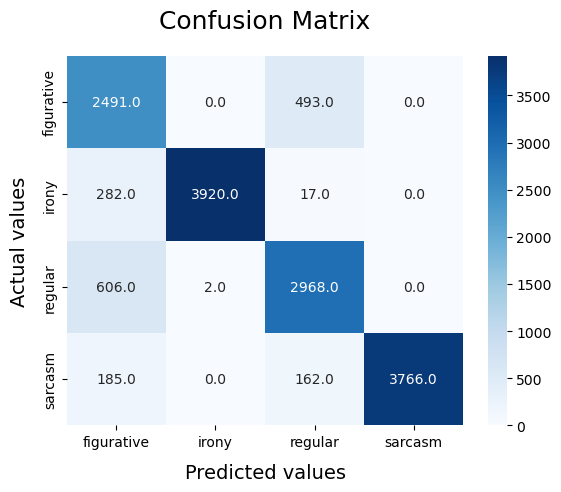

In [179]:
NBmodel = MultinomialNB()
NBmodel.fit(X_train_embed, y_train)
model_Evaluate1(NBmodel)
y_pred1 = NBmodel.predict(X_test_embed)

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      2984
         1.0       1.00      0.99      0.99      4219
         2.0       0.99      0.92      0.95      3576
         3.0       1.00      1.00      1.00      4113

    accuracy                           0.97     14892
   macro avg       0.97      0.97      0.97     14892
weighted avg       0.98      0.97      0.97     14892

      0     1     2     3
0  2947     4    33     0
1    47  4169     3     0
2   291     0  3285     0
3     3     0     0  4110


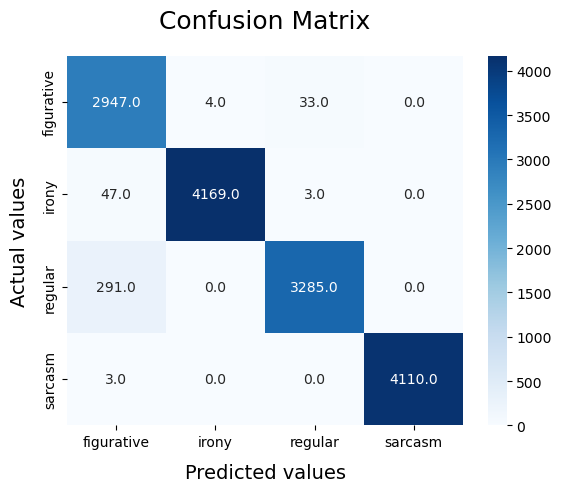

In [180]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train_embed, y_train)
model_Evaluate1(SVCmodel)
y_pred2 = SVCmodel.predict(X_test_embed)

              precision    recall  f1-score   support

         0.0       0.89      0.99      0.93      2984
         1.0       1.00      0.99      0.99      4219
         2.0       0.99      0.92      0.95      3576
         3.0       1.00      1.00      1.00      4113

    accuracy                           0.97     14892
   macro avg       0.97      0.97      0.97     14892
weighted avg       0.97      0.97      0.97     14892

      0     1     2     3
0  2941     0    25    18
1    50  4167     2     0
2   303     0  3273     0
3    19     0     0  4094


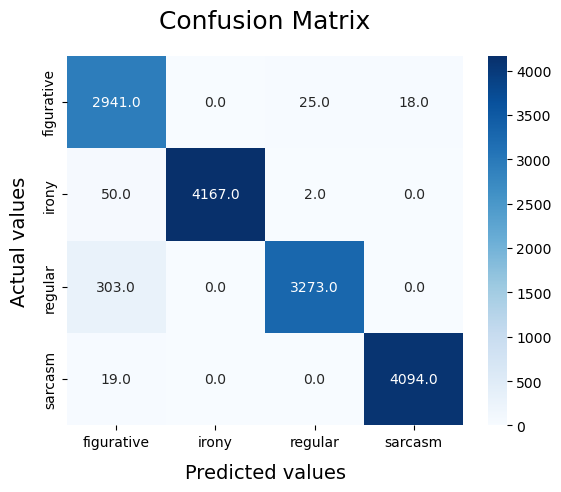

In [181]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train_embed, y_train)
model_Evaluate1(LRmodel)
y_pred3 = LRmodel.predict(X_test_embed)

In [182]:
# Save Word2Vec model using pickle
with open("word2vec_model1.pkl", "wb") as file:
    pickle.dump(word2vec_model, file)

In [183]:
#SVCmodel
# Save Word2Vec model using pickle
with open("SVCmodel1.pkl", "wb") as file:
    pickle.dump(SVCmodel, file)

In [184]:
from sklearn.model_selection import cross_val_score

In [185]:
full_2d=np.stack(data4['vector'].values)

In [186]:
full_data_embed = scaler.fit_transform(full_2d)

In [187]:
scores = cross_val_score(SVCmodel,full_data_embed, data4['class'], cv=5)

In [188]:
scores

array([0.9769675 , 0.98059361, 0.97401289, 0.96763363, 0.97461724])

In [189]:
import gensim.downloader as api

In [190]:
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


- In a keyed vector, each element is associated with a unique key or identifier. This key allows for efficient lookup and retrieval of the corresponding value. 
- The keys are usually unique within the vector, and they provide a way to access and manipulate the associated values.

## Word Embedding using GloVec

In [191]:
words = dict()

def add_to_dict(d, filename):
  with open(filename, 'r',encoding="utf8") as f:
    for line in f.readlines():
      line = line.split(' ')

      try:
        d[line[0]] = np.array(line[1:], dtype=float)
      except:
        continue

add_to_dict(words, 'G:\P239\glove.twitter.27B\glove.twitter.27B.200d.txt')
#words

In [192]:
len(words)

1193514

In [193]:
with open("corpus.pkl", "wb") as file:
    pickle.dump(words, file)

In [194]:
with open("corpus.pkl", "rb") as file:
    words = pickle.load(file)

In [195]:
type(words)

dict

In [196]:
def message_to_word_vectors(message, word_dict=words):
    vectors = np.zeros(200)
    ctr=1
    for token in message:
        if token not in word_dict:
            continue
    
        token_vector = word_dict[token]
        vectors+=token_vector
        ctr+=1

    vectors=vectors/ctr
    #vectors.append(token_vector)
    return np.array(vectors, dtype=float)

In [198]:
from sklearn.decomposition import PCA
class_vectors = np.array([words[word] for word in classes])
pca=PCA(n_components=2)
result=pca.fit_transform(class_vectors)
result

array([[ 1.09486846,  4.75090071],
       [-1.37658683, -0.38996694],
       [ 4.2918968 , -2.79768089],
       [-4.01017843, -1.56325287]])

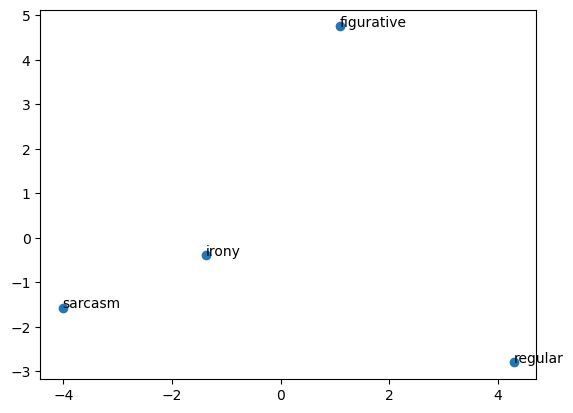

In [199]:
plt.scatter(result[:,0],result[:,1])
for i,word in enumerate(classes):
    plt.annotate(word,xy=(result[i,0],result[i,1]))
plt.show()

In [200]:
data3['vector']=data3['tweets'].apply(message_to_word_vectors)
data3

tweets  class  \
0                        [aware, dirty, step, sarcastic]      0   
1                                  [sarcasm, understand]      0   
2                 [reader, sensible, shocker, sarcastic]      0   
3                               [feeling, game, sarcasm]      0   
4                    [probably, missed, text, sarcastic]      0   
...                                                  ...    ...   
81403                     [photo, image, heart, sarcasm]      3   
81404  [knew, put, universe, maybe, date, horizon, jo...      3   
81405  [wanted, thanks, puberty, letting, apart, bitt...      3   
81406  [sure, coverage, fox, special, hidden, harvest...      3   
81407                     [u, wont, believe, p, sarcasm]      3   

                                                  vector  
0      [0.10723, -0.06670999999999999, -0.11762399999...  
1      [0.16168433333333335, 0.29429, 0.009629, 0.015...  
2      [0.24221108, 0.207966, -0.28053, 0.03476217999...  
3      [0.39361, 0.154996825, 0.15775925000000002, -0...  
4      [0.25080868, 0.40669580000000005, -0.078876599...  
...                                                  ...  
81403  [0.12507479999999999, -0.0081822, -0.2978006, ...  
81404  [0.034296666666666656, 0.1688883, 0.0035707777...  
81405  [-0.0014117818181818111, 0.08381561818181817, ...  
81406  [0.0158892, 0.1314263, -0.02598089999999999, -...  
81407  [0.179445, 0.31623150000000005, 0.040402833333...  

[81359 rows x 3 columns]

In [201]:
X_train, X_test, y_train, y_test = train_test_split(
    data3.vector.values,
    data3['class'],
    test_size = 0.20, 
    random_state =61
)

In [202]:
X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [203]:
X_train_embed = scaler.fit_transform(X_train_2d)
X_test_embed = scaler.transform(X_test_2d)

              precision    recall  f1-score   support

           0       0.29      0.22      0.25      4240
           1       0.62      0.87      0.72      4135
           2       0.88      0.78      0.83      3707
           3       0.66      0.64      0.65      4190

    accuracy                           0.62     16272
   macro avg       0.61      0.63      0.61     16272
weighted avg       0.60      0.62      0.60     16272

      0     1     2     3
0   916  1849   136  1339
1   337  3585   210     3
2   480   329  2878    20
3  1458     8    39  2685


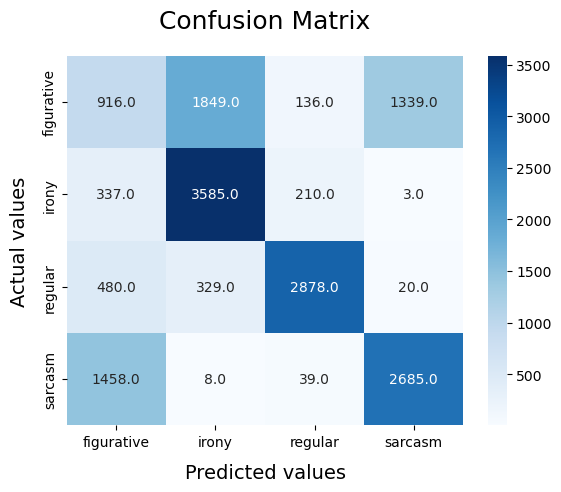

In [204]:
NBmodel = MultinomialNB()
NBmodel.fit(X_train_embed, y_train)
model_Evaluate1(NBmodel)
y_pred1 = NBmodel.predict(X_test_embed)

In [205]:
roc_curves={}
# Create a binary classifier for each class using One-vs-All approach
for class_label in np.unique(y):
    # Set the target labels for the current binary classification task
    binary_labels = np.where(y_train == class_label, 1, 0)
    NBmodel.fit(X_train_embed, binary_labels)
    probabilities = NBmodel.predict_proba(X_test_embed)[:, 1]
    fpr, tpr, _ = sklearn.metrics.roc_curve(y_test, probabilities, pos_label=class_label)
    roc_auc = auc(fpr, tpr)
    roc_curves[class_label] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}

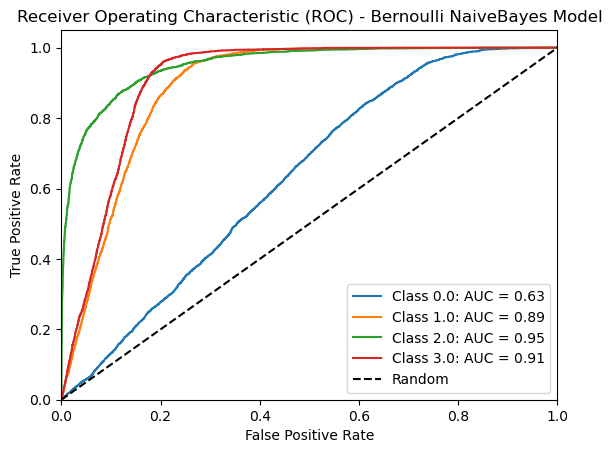

In [206]:
plt.figure()
for class_label, curve_data in roc_curves.items():
    plt.plot(curve_data['fpr'], curve_data['tpr'], label='Class {}: AUC = {:.2f}'.format(class_label, curve_data['auc']))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Bernoulli NaiveBayes Model')
plt.legend(loc='lower right')
plt.show()

              precision    recall  f1-score   support

           0       0.30      0.01      0.02      4240
           1       0.65      0.96      0.78      4135
           2       0.93      0.98      0.95      3707
           3       0.66      0.98      0.79      4190

    accuracy                           0.72     16272
   macro avg       0.64      0.73      0.63     16272
weighted avg       0.63      0.72      0.62     16272

    0     1     2     3
0  43  2032    94  2071
1  31  3953   147     4
2  12    64  3624     7
3  56     3    44  4087


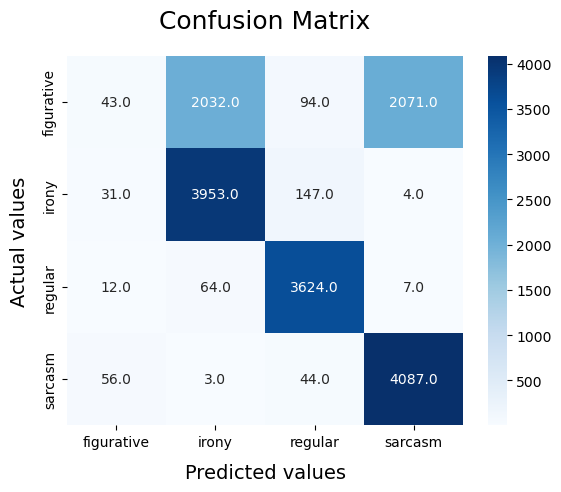

In [207]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train_embed, y_train)
model_Evaluate1(SVCmodel)
y_pred2 = SVCmodel.predict(X_test_embed)

In [208]:
# Create a binary classifier for each class using One-vs-All approach
for class_label in np.unique(y):
    # Set the target labels for the current binary classification task
    binary_labels = np.where(y_train == class_label, 1, 0)
    SVCmodel.fit(X_train_embed, binary_labels)
    decision_values = SVCmodel.decision_function(X_test_embed)
    probabilities = (decision_values - np.min(decision_values)) / (np.max(decision_values) - np.min(decision_values))
    fpr, tpr, _ = roc_curve(y_test, probabilities, pos_label=class_label)
    roc_auc = auc(fpr, tpr)
    roc_curves[class_label] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}

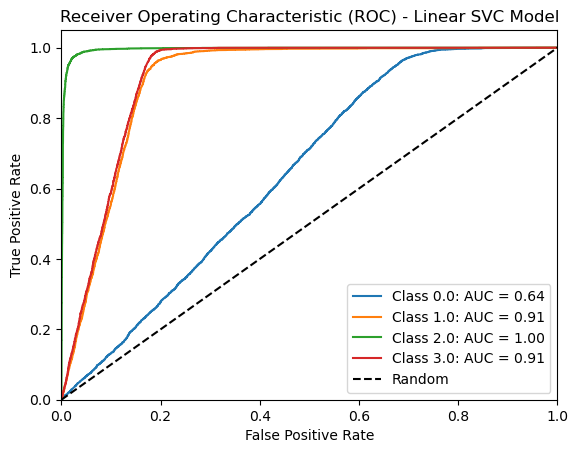

In [209]:
plt.figure()
for class_label, curve_data in roc_curves.items():
    plt.plot(curve_data['fpr'], curve_data['tpr'], label='Class {}: AUC = {:.2f}'.format(class_label, curve_data['auc']))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Linear SVC Model')
plt.legend(loc='lower right')
plt.show()

              precision    recall  f1-score   support

           0       0.33      0.12      0.18      4240
           1       0.65      0.88      0.75      4135
           2       0.94      0.97      0.96      3707
           3       0.66      0.84      0.74      4190

    accuracy                           0.69     16272
   macro avg       0.65      0.70      0.66     16272
weighted avg       0.64      0.69      0.64     16272

     0     1     2     3
0  517  1889    73  1761
1  374  3636   123     2
2   32    71  3598     6
3  665     0    22  3503


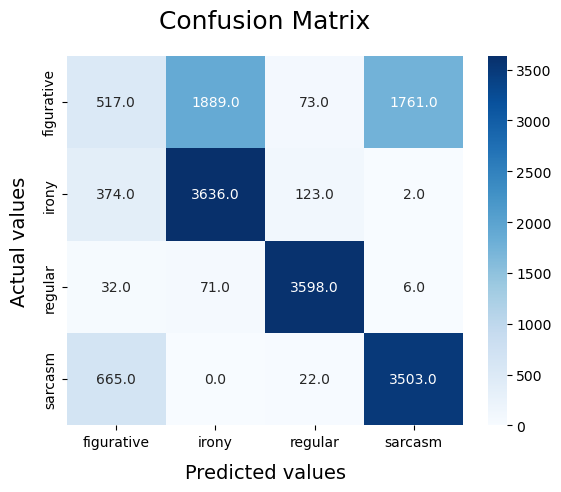

In [210]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train_embed, y_train)
model_Evaluate1(LRmodel)
y_pred3 = LRmodel.predict(X_test_embed)

In [211]:
# Create a binary classifier for each class using One-vs-All approach
for class_label in np.unique(y):
    # Set the target labels for the current binary classification task
    binary_labels = np.where(y_train == class_label, 1, 0)
    LRmodel.fit(X_train_embed, binary_labels)
    decision_values = LRmodel.decision_function(X_test_embed)
    probabilities = (decision_values - np.min(decision_values)) / (np.max(decision_values) - np.min(decision_values))
    fpr, tpr, _ = roc_curve(y_test, probabilities, pos_label=class_label)
    roc_auc = auc(fpr, tpr)
    roc_curves[class_label] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}

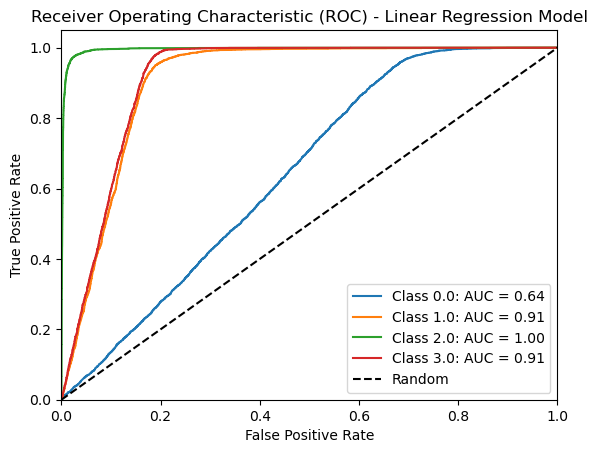

In [212]:
plt.figure()
for class_label, curve_data in roc_curves.items():
    plt.plot(curve_data['fpr'], curve_data['tpr'], label='Class {}: AUC = {:.2f}'.format(class_label, curve_data['auc']))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Linear Regression Model')
plt.legend(loc='lower right')
plt.show()

In [213]:
knn = KNeighborsClassifier(n_neighbors=5,weights='uniform')

In [214]:
knn.fit(X_train_embed, y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.21      0.18      0.19      4240
           1       0.54      0.68      0.60      4135
           2       0.97      0.75      0.85      3707
           3       0.63      0.69      0.66      4190

    accuracy                           0.57     16272
   macro avg       0.59      0.57      0.57     16272
weighted avg       0.57      0.57      0.56     16272

      0     1     2     3
0   764  1802    27  1647
1  1286  2793    36    20
2   340   547  2773    47
3  1206    76    20  2888


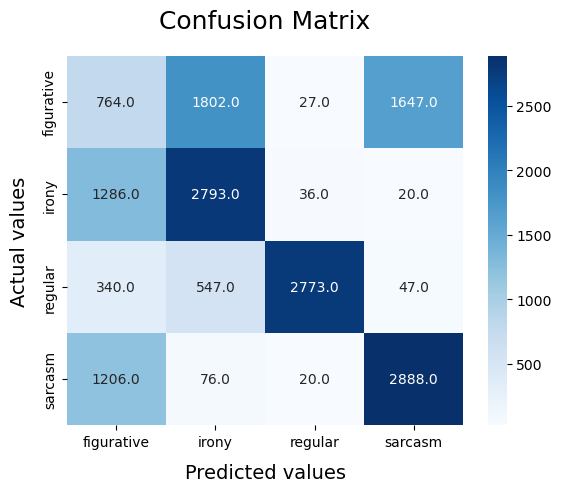

In [215]:
model_Evaluate1(knn)
y_pred4 = knn.predict(X_test_embed)

In [216]:
from sklearn.ensemble import RandomForestClassifier

In [217]:
model = RandomForestClassifier(n_estimators=100)

In [218]:
model.fit(X_train_embed, y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.04      0.02      0.03      4240
           1       0.54      0.63      0.58      4135
           2       0.92      0.95      0.94      3707
           3       0.60      0.74      0.66      4190

    accuracy                           0.58     16272
   macro avg       0.53      0.59      0.55     16272
weighted avg       0.51      0.58      0.54     16272

      0     1     2     3
0   104  2039    93  2004
1  1340  2616   166    13
2    29   119  3539    20
3   976    48    65  3101


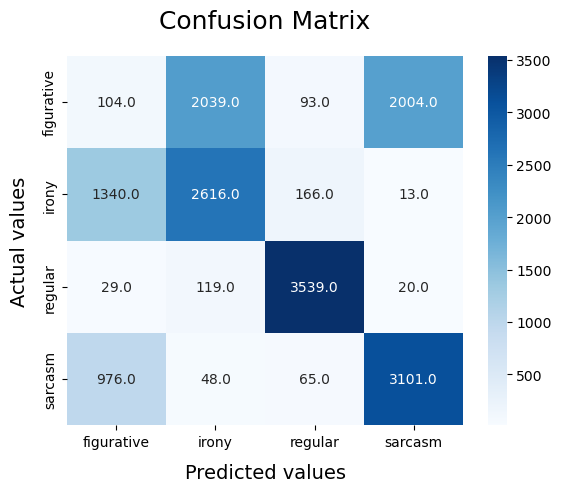

In [219]:
model_Evaluate1(model)
y_pred5 = model.predict(X_test_embed)

In [220]:
print(np.round(np.mean(y_pred1==y_test)*100,2) , "Bernoulli Naive Bayes Model")
print(np.round(np.mean(y_pred2==y_test)*100,2) , "SVC model")
print(np.round(np.mean(y_pred3==y_test)*100,2) , "Linear Regression Model")
print(np.round(np.mean(y_pred4==y_test)*100,2) , "KNN Model")
print(np.round(np.mean(y_pred5==y_test)*100,2) , "Random Forest Model")

61.85 Bernoulli Naive Bayes Model
71.95 SVC model
69.16 Linear Regression Model
56.65 KNN Model
57.52 Random Forest Model


In [221]:
data4['vector']=data4['tweets'].apply(message_to_word_vectors)
data4

tweets  class  \
0                                                [aware]    0.0   
2                                               [reader]    0.0   
3                                                 [game]    0.0   
5                                    [rachel, reminisce]    0.0   
7                                [sexually, intoxicated]    0.0   
...                                                  ...    ...   
81403                                          [sarcasm]    3.0   
81404                        [knew, put, maybe, sarcasm]    3.0   
81405  [wanted, thanks, puberty, letting, bitty, fuck...    3.0   
81406                [sure, coverage, arsonist, sarcasm]    3.0   
81407                     [u, wont, believe, p, sarcasm]    3.0   

                                                  vector  
0      [0.05624, 0.08454, -0.291765, -0.0655, -0.2364...  
2      [0.0035727, 0.39113, -0.44661, -0.155715, 0.02...  
3      [0.229155, 0.24446, 0.19876, -0.41119, 0.09587...  
5      [0.10660233333333331, -0.18180233333333332, 0....  
7      [-0.12359733333333334, 0.131736, 0.01176000000...  
...                                                  ...  
81403  [0.278945, 0.06447, 0.0294035, -0.08592, -0.10...  
81404  [0.112128, 0.18984494000000002, 0.0107114, 0.1...  
81405  [-0.022280177777777785, 0.06343131111111111, 0...  
81406  [0.12384139999999999, 0.04230540000000001, -0....  
81407  [0.179445, 0.31623150000000005, 0.040402833333...  

[74460 rows x 3 columns]

In [222]:
X_train, X_test, y_train, y_test = train_test_split(
    data4.vector.values,
    data4['class'],
    test_size = 0.20, 
    random_state =61
)

In [223]:
X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [224]:
X_train_embed = scaler.fit_transform(X_train_2d)
X_test_embed = scaler.transform(X_test_2d)

              precision    recall  f1-score   support

         0.0       0.92      0.51      0.66      2984
         1.0       0.85      0.98      0.91      4219
         2.0       0.78      0.93      0.85      3576
         3.0       0.98      0.97      0.97      4113

    accuracy                           0.87     14892
   macro avg       0.88      0.85      0.85     14892
weighted avg       0.88      0.87      0.86     14892

      0     1     2     3
0  1529   577   870     8
1     6  4140    73     0
2   109    47  3340    80
3    14   104    20  3975


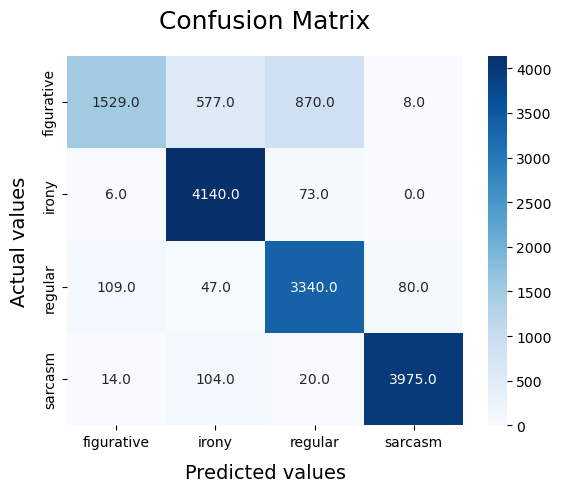

In [225]:
NBmodel = MultinomialNB()
NBmodel.fit(X_train_embed, y_train)
model_Evaluate1(NBmodel)
y_pred1 = NBmodel.predict(X_test_embed)

In [226]:
roc_curves={}
# Create a binary classifier for each class using One-vs-All approach
for class_label in np.unique(y):
    # Set the target labels for the current binary classification task
    binary_labels = np.where(y_train == class_label, 1, 0)
    NBmodel.fit(X_train_embed, binary_labels)
    probabilities = NBmodel.predict_proba(X_test_embed)[:, 1]
    fpr, tpr, _ = sklearn.metrics.roc_curve(y_test, probabilities, pos_label=class_label)
    roc_auc = auc(fpr, tpr)
    roc_curves[class_label] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}

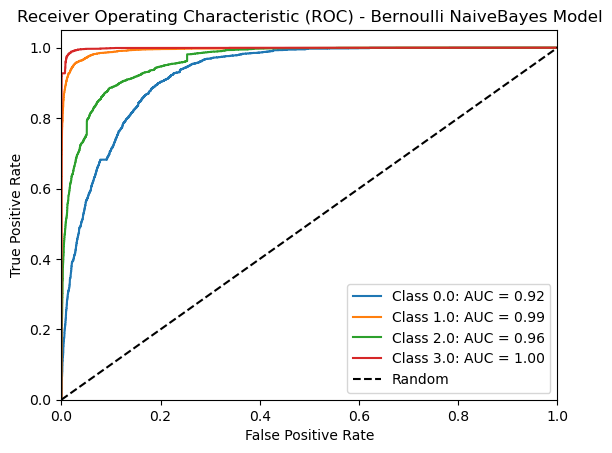

In [227]:
plt.figure()
for class_label, curve_data in roc_curves.items():
    plt.plot(curve_data['fpr'], curve_data['tpr'], label='Class {}: AUC = {:.2f}'.format(class_label, curve_data['auc']))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Bernoulli NaiveBayes Model')
plt.legend(loc='lower right')
plt.show()

              precision    recall  f1-score   support

         0.0       0.92      0.93      0.93      2984
         1.0       0.99      0.99      0.99      4219
         2.0       0.94      0.94      0.94      3576
         3.0       1.00      1.00      1.00      4113

    accuracy                           0.97     14892
   macro avg       0.96      0.96      0.96     14892
weighted avg       0.97      0.97      0.97     14892

      0     1     2     3
0  2787    22   172     3
1    39  4156    24     0
2   209     7  3359     1
3     2     0     1  4110


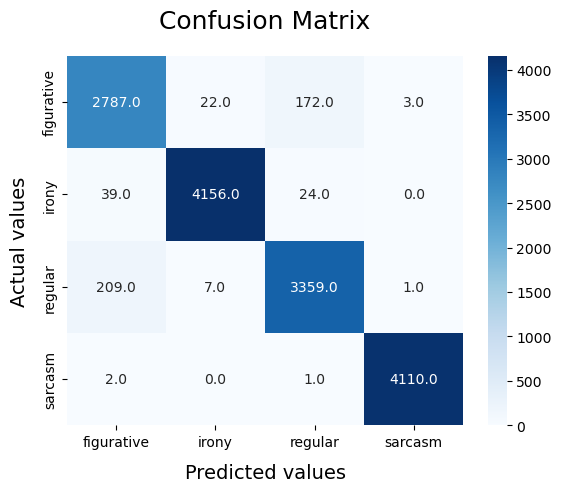

In [228]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train_embed, y_train)
model_Evaluate1(SVCmodel)
y_pred2 = SVCmodel.predict(X_test_embed)

In [229]:
# Create a binary classifier for each class using One-vs-All approach
for class_label in np.unique(y):
    # Set the target labels for the current binary classification task
    binary_labels = np.where(y_train == class_label, 1, 0)
    SVCmodel.fit(X_train_embed, binary_labels)
    decision_values = SVCmodel.decision_function(X_test_embed)
    probabilities = (decision_values - np.min(decision_values)) / (np.max(decision_values) - np.min(decision_values))
    fpr, tpr, _ = roc_curve(y_test, probabilities, pos_label=class_label)
    roc_auc = auc(fpr, tpr)
    roc_curves[class_label] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}

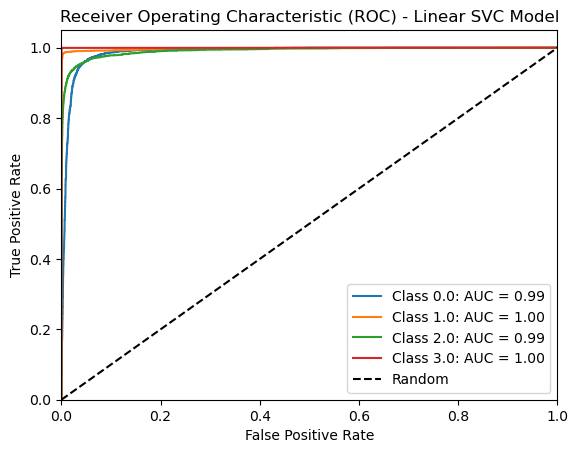

In [230]:
plt.figure()
for class_label, curve_data in roc_curves.items():
    plt.plot(curve_data['fpr'], curve_data['tpr'], label='Class {}: AUC = {:.2f}'.format(class_label, curve_data['auc']))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Linear SVC Model')
plt.legend(loc='lower right')
plt.show()

              precision    recall  f1-score   support

         0.0       0.92      0.93      0.93      2984
         1.0       0.99      0.98      0.99      4219
         2.0       0.94      0.94      0.94      3576
         3.0       1.00      1.00      1.00      4113

    accuracy                           0.97     14892
   macro avg       0.96      0.96      0.96     14892
weighted avg       0.97      0.97      0.97     14892

      0     1     2     3
0  2786    21   175     2
1    45  4151    23     0
2   204     7  3365     0
3     3     0     1  4109


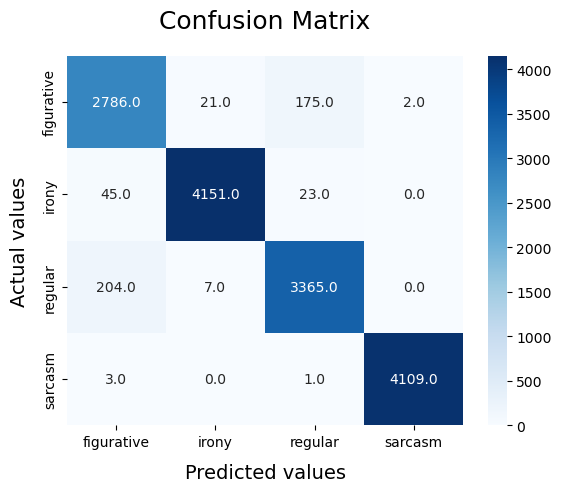

In [231]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train_embed, y_train)
model_Evaluate1(LRmodel)
y_pred3 = LRmodel.predict(X_test_embed)

In [232]:
# Create a binary classifier for each class using One-vs-All approach
for class_label in np.unique(y):
    # Set the target labels for the current binary classification task
    binary_labels = np.where(y_train == class_label, 1, 0)
    LRmodel.fit(X_train_embed, binary_labels)
    decision_values = LRmodel.decision_function(X_test_embed)
    probabilities = (decision_values - np.min(decision_values)) / (np.max(decision_values) - np.min(decision_values))
    fpr, tpr, _ = roc_curve(y_test, probabilities, pos_label=class_label)
    roc_auc = auc(fpr, tpr)
    roc_curves[class_label] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}

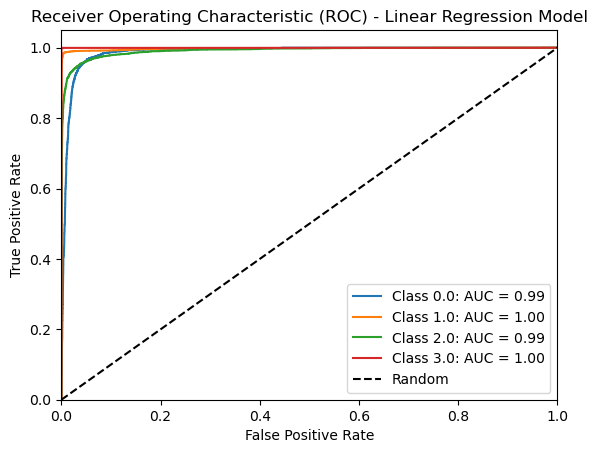

In [233]:
plt.figure()
for class_label, curve_data in roc_curves.items():
    plt.plot(curve_data['fpr'], curve_data['tpr'], label='Class {}: AUC = {:.2f}'.format(class_label, curve_data['auc']))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Linear Regression Model')
plt.legend(loc='lower right')
plt.show()

In [234]:
knn = KNeighborsClassifier(n_neighbors=5,weights='uniform')

In [235]:
knn.fit(X_train_embed, y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

         0.0       0.95      0.90      0.93      2984
         1.0       0.94      1.00      0.96      4219
         2.0       0.99      0.95      0.97      3576
         3.0       0.99      1.00      1.00      4113

    accuracy                           0.97     14892
   macro avg       0.97      0.96      0.96     14892
weighted avg       0.97      0.97      0.97     14892

      0     1     2     3
0  2700   221    39    24
1    16  4201     2     0
2   121    63  3387     5
3     5     3     1  4104


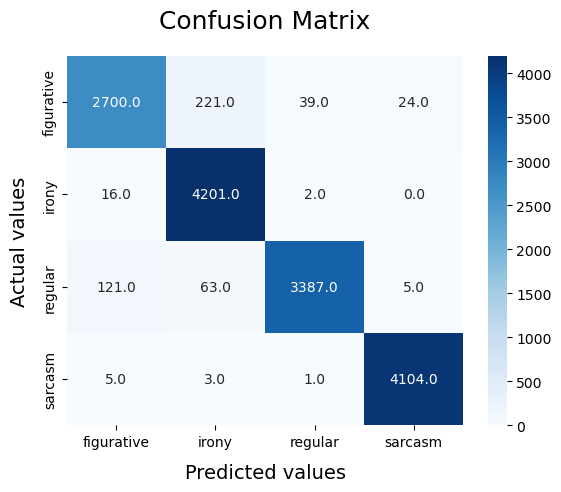

In [236]:
model_Evaluate1(knn)
y_pred4 = knn.predict(X_test_embed)

In [237]:
from sklearn.ensemble import RandomForestClassifier

In [238]:
model = RandomForestClassifier(n_estimators=100)

In [239]:
model.fit(X_train_embed, y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93      2984
         1.0       0.98      0.98      0.98      4219
         2.0       0.96      0.94      0.95      3576
         3.0       1.00      0.99      1.00      4113

    accuracy                           0.97     14892
   macro avg       0.96      0.96      0.96     14892
weighted avg       0.97      0.97      0.97     14892

      0     1     2     3
0  2828    55    96     5
1    59  4119    41     0
2   194     8  3374     0
3    26     7     0  4080


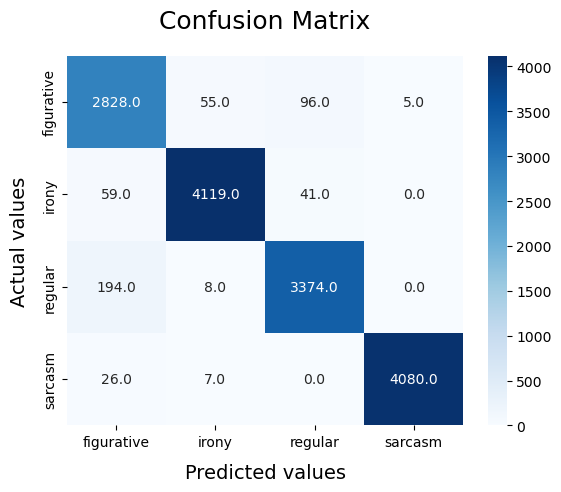

In [240]:
model_Evaluate1(model)
y_pred5 = model.predict(X_test_embed)

In [241]:
print(np.round(np.mean(y_pred1==y_test)*100,2) , "Bernoulli Naive Bayes Model")
print(np.round(np.mean(y_pred2==y_test)*100,2) , "SVC model")
print(np.round(np.mean(y_pred3==y_test)*100,2) , "Linear Regression Model")
print(np.round(np.mean(y_pred4==y_test)*100,2) , "KNN Model")
print(np.round(np.mean(y_pred5==y_test)*100,2) , "Random Forest Model")

87.19 Bernoulli Naive Bayes Model
96.78 SVC model
96.77 Linear Regression Model
96.64 KNN Model
96.7 Random Forest Model


In [242]:
#SVCmodel
# Save Word2Vec model using pickle
with open("SVCmodel2.pkl", "wb") as file:
    pickle.dump(SVCmodel, file)